In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EXPLORATION
 - lecture des deux jeux de données collectés sur le site London.gov.uk
 - fusion des jeux de données
 - nettoyage des données collectées



Création du Dataframe Incident

In [ ]:
# Chemin d'accès au fichier CSV
file_path1 = "/content/drive/MyDrive/juin23_bda_pompiers/LFB Incident data .csv"

# Lecture du fichier CSV
Incident = pd.read_csv(file_path1)

Incident.head()

<ipython-input-2-b282025d50bf>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Incident = pd.read_csv(file_path1)


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60.0,255.0,1.0
1,1091,01 Jan 2009,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0
2,2091,01 Jan 2009,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60.0,255.0,2.0
3,3091,01 Jan 2009,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60.0,255.0,2.0
4,5091,01 Jan 2009,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60.0,255.0,1.0


Création du DataFrame Mobilisation

In [ ]:
# Chemin d'accès au fichier CSV
file_path2 = "/content/drive/My Drive/juin23_bda_pompiers/LFB_Mobilisation_data.csv"

# Lecture du fichier CSV
Mobilisation = pd.read_csv(file_path2)

Mobilisation.head()

<ipython-input-3-97435bf79512>:5: DtypeWarning: Columns (0,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Mobilisation = pd.read_csv(file_path2)


,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,2009,0,38426,H271,1,01/01/2009 00:02:27,NaN,01/01/2009 00:07:46,NaN,...,01/01/2009 00:16:46,01/01/2009 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,2009,0,38427,H212,2,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,253.0,...,01/01/2009 00:12:17,01/01/2009 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,2009,0,38429,A341,1,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,151.0,...,01/01/2009 00:16:33,01/01/2009 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091,2009,0,38430,G232,1,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,108.0,...,01/01/2009 00:20:38,01/01/2009 00:20:38,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091,2009,0,38432,A311,1,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,114.0,...,01/01/2009 00:11:58,01/01/2009 00:22:29,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


Fusion des 2 Dataframes

In [ ]:
pompier_alldata= pd.merge(Incident, Mobilisation, on=['IncidentNumber','CalYear','HourOfCall'])
pompier_alldata.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,01/01/2009 00:16:46,01/01/2009 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,01/01/2009 00:12:17,01/01/2009 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,01 Jan 2009,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,01/01/2009 00:16:33,01/01/2009 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091,01 Jan 2009,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,01/01/2009 00:20:38,01/01/2009 00:20:38,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091,01 Jan 2009,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,01/01/2009 00:11:58,01/01/2009 00:22:29,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


Filtrage du Dataframe pour ne garder que les données de 2017 a 2022

In [ ]:
years = [2017 , 2018 , 2019 , 2020 , 2021 , 2022]
pompier_alldata_new = pompier_alldata[pompier_alldata[ 'CalYear'].isin(years)]

display (pompier_alldata_new.head (10))

#Verification
print(pompier_alldata_new['CalYear'].unique())


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
1157824,000004-01012017,01 Jan 2017,2017,00:06:18,0,False Alarm,AFA,NaN,Non Residential,Engineering manufacturing plant,...,01/01/2017 00:34:52,NaN,E25,Plumstead,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc"
1157825,000005-01012017,01 Jan 2017,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:11:14,NaN,A23,Euston,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1157826,000006-01012017,01 Jan 2017,2017,00:07:57,0,Fire,Primary Fire,NaN,Non Residential,Restaurant/cafe,...,01/01/2017 01:25:33,NaN,F43,Barking,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1157827,000008-01012017,01 Jan 2017,2017,00:12:44,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,01/01/2017 00:33:26,NaN,G31,Northolt,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
1157828,000008-01012017,01 Jan 2017,2017,00:12:44,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,01/01/2017 00:33:43,NaN,G31,Northolt,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
1157829,000009-01012017,01 Jan 2017,2017,00:13:27,0,False Alarm,AFA,NaN,Non Residential,Purpose built office,...,01/01/2017 00:35:05,NaN,F24,Shoreditch,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1157830,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:41:21,NaN,G30,Wembley,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc"
1157831,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:41:28,NaN,G30,Wembley,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
1157832,000013-01012017,01 Jan 2017,2017,00:20:01,0,Fire,Primary Fire,NaN,Outdoor Structure,Other outdoor structures,...,01/01/2017 00:35:50,NaN,F42,Ilford,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
1157833,000013-01012017,01 Jan 2017,2017,00:20:01,0,Fire,Primary Fire,NaN,Outdoor Structure,Other outdoor structures,...,01/01/2017 00:35:49,NaN,F35,Woodford,Home Station,2,Initial,Initial Mobilisation,12.0,Not held up


[2017 2018 2019 2020 2021 2022]


Informations sur le dataframe

In [ ]:
pompier_alldata_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942502 entries, 1157824 to 2100325
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          942502 non-null  object 
 1   DateOfCall                              942502 non-null  object 
 2   CalYear                                 942502 non-null  int64  
 3   TimeOfCall                              942502 non-null  object 
 4   HourOfCall                              942502 non-null  int64  
 5   IncidentGroup                           942502 non-null  object 
 6   StopCodeDescription                     942502 non-null  object 
 7   SpecialServiceType                      206917 non-null  object 
 8   PropertyCategory                        942502 non-null  object 
 9   PropertyType                            942502 non-null  object 
 10  AddressQualifier                     

In [ ]:
# Visualisation des valeurs manquantes
display (pompier_alldata_new.isna().sum())

# Valeurs en pourcentages
percentage_missing = pompier_alldata_new.isna().mean() * 100
print (percentage_missing)

IncidentNumber                                 0
DateOfCall                                     0
CalYear                                        0
TimeOfCall                                     0
HourOfCall                                     0
IncidentGroup                                  0
StopCodeDescription                            0
SpecialServiceType                        735585
PropertyCategory                               0
PropertyType                                   0
AddressQualifier                               0
Postcode_full                             548803
Postcode_district                              0
UPRN                                           0
USRN                                           0
IncGeo_BoroughCode                             0
IncGeo_BoroughName                             0
ProperCase                                     0
IncGeo_WardCode                                4
IncGeo_WardName                                4
IncGeo_WardNameNew  

IncidentNumber                             0.000000
DateOfCall                                 0.000000
CalYear                                    0.000000
TimeOfCall                                 0.000000
HourOfCall                                 0.000000
IncidentGroup                              0.000000
StopCodeDescription                        0.000000
SpecialServiceType                        78.045988
PropertyCategory                           0.000000
PropertyType                               0.000000
AddressQualifier                           0.000000
Postcode_full                             58.228311
Postcode_district                          0.000000
UPRN                                       0.000000
USRN                                       0.000000
IncGeo_BoroughCode                         0.000000
IncGeo_BoroughName                         0.000000
ProperCase                                 0.000000
IncGeo_WardCode                            0.000424
IncGeo_WardN

Gestion des doublons

In [ ]:
pompier_alldata_new.duplicated().sum()
print('Il y a ',pompier_alldata_new.duplicated().sum(),'doublons')

Il y a  0 doublons


Suppression des colonnes identifiées comme doubles ou inutiles

In [ ]:
# Les colonnes « IncGeo_BoroughName » et « ProperCase » contiennent les mêmes informations, l’une en majuscule l’autre en minuscules.
#On peut supprimer une colonne
pompier_alldata_new.drop (["ProperCase"], axis=1, inplace= True )

# La colonne FRS contient 1 seule valeur : « Londres ». Logique, c’est le sujet de l’étude. On peut supprimer cette colonne
pompier_alldata_new.drop (["FRS"], axis=1, inplace= True )

# Les colonnes « DeployedFromStation_Code » et "DeployedFromStation_Name" contiennent le même nombre de valeurs uniques,
#l’une a des information codées l’autre avec les noms. On peut en supprimer une.
pompier_alldata_new.drop ("DeployedFromStation_Code", axis=1, inplace=True)

#Les colonnes « PlusCode_Code » et " PlusCode_Description " contiennent le même nombre de valeurs uniques,
#l’une a des informations abrégées l’autre a des information complètes. On peut en supprimer une.
pompier_alldata_new.drop ("PlusCode_Code", axis=1, inplace=True)

# la colonne "DateAndTimeReturned" a 99% de Nan, on peut la supprimer
pompier_alldata_new.drop ("DateAndTimeReturned", axis=1, inplace=True)

#Les colonnes « DelayCodeId» et "DelayCode_Description" contiennent le même nombre de valeurs uniques,
#l’une a des informations codées l’autre avec une.Elles on 76 % de na, on peut les supprimer
pompier_alldata_new.drop ("DelayCodeId", axis=1, inplace=True)
pompier_alldata_new.drop ("DelayCode_Description", axis=1, inplace=True)


# Les colonnes "SecondPumpArriving_AttendanceTime et "SecondPumpArriving_DeployedFromStation" ont 39% de na, elles sont inutilisables
pompier_alldata_new.drop ("SecondPumpArriving_AttendanceTime", axis=1, inplace=True)
pompier_alldata_new.drop ("SecondPumpArriving_DeployedFromStation", axis=1, inplace=True)


<ipython-input-6-af260ad27f62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pompier_alldata_new.drop (["ProperCase"], axis=1, inplace= True )
<ipython-input-6-af260ad27f62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pompier_alldata_new.drop (["FRS"], axis=1, inplace= True )
<ipython-input-6-af260ad27f62>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pompier_alldata_new.drop ("DeployedFromStation_Code", axis=1, inplace=Tru

In [ ]:
#vérification de la suppression
pompier_alldata_new.info()
print('Il y a ',pompier_alldata_new.duplicated().sum(),'doublons')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942502 entries, 1157824 to 2100325
Data columns (total 49 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   IncidentNumber                         942502 non-null  object 
 1   DateOfCall                             942502 non-null  object 
 2   CalYear                                942502 non-null  int64  
 3   TimeOfCall                             942502 non-null  object 
 4   HourOfCall                             942502 non-null  int64  
 5   IncidentGroup                          942502 non-null  object 
 6   StopCodeDescription                    942502 non-null  object 
 7   SpecialServiceType                     206917 non-null  object 
 8   PropertyCategory                       942502 non-null  object 
 9   PropertyType                           942502 non-null  object 
 10  AddressQualifier                       942502 non

Gestion des valeurs manquantes

In [ ]:
display (pompier_alldata_new.isna().sum())

percentage_missing = pompier_alldata_new.isna().mean() * 100
print (percentage_missing)

IncidentNumber                                0
DateOfCall                                    0
CalYear                                       0
TimeOfCall                                    0
HourOfCall                                    0
IncidentGroup                                 0
StopCodeDescription                           0
SpecialServiceType                       735585
PropertyCategory                              0
PropertyType                                  0
AddressQualifier                              0
Postcode_full                            548803
Postcode_district                             0
UPRN                                          0
USRN                                          0
IncGeo_BoroughCode                            0
IncGeo_BoroughName                            0
IncGeo_WardCode                               4
IncGeo_WardName                               4
IncGeo_WardNameNew                            4
Easting_m                               

IncidentNumber                            0.000000
DateOfCall                                0.000000
CalYear                                   0.000000
TimeOfCall                                0.000000
HourOfCall                                0.000000
IncidentGroup                             0.000000
StopCodeDescription                       0.000000
SpecialServiceType                       78.045988
PropertyCategory                          0.000000
PropertyType                              0.000000
AddressQualifier                          0.000000
Postcode_full                            58.228311
Postcode_district                         0.000000
UPRN                                      0.000000
USRN                                      0.000000
IncGeo_BoroughCode                        0.000000
IncGeo_BoroughName                        0.000000
IncGeo_WardCode                           0.000424
IncGeo_WardName                           0.000424
IncGeo_WardNameNew             

In [ ]:
# Visualisation des colonnnes à 58% de na : coordonnées
display (pompier_alldata_new.loc [pompier_alldata_new["Easting_m"].isna()])
display (pompier_alldata_new.loc [pompier_alldata_new["Northing_m"].isna()])
display (pompier_alldata_new.loc [pompier_alldata_new["Latitude"].isna()])
display (pompier_alldata_new.loc [pompier_alldata_new["Longitude"].isna()])
display (pompier_alldata_new.loc [pompier_alldata_new["Postcode_full"].isna()])

# ce sont visiblement les mêmes incidents qui sont concernés, on pourra utiliser les deux colonnes Easting rounded et Northing_rounded à la place



,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1157825,000005-01012017,01 Jan 2017,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:07:29,01/01/2017 00:10:31,55.0,182.0,237,01/01/2017 00:11:14,Euston,Home Station,1,Initial Mobilisation
1157830,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:18:56,01/01/2017 00:24:36,81.0,340.0,421,01/01/2017 00:41:21,Wembley,Home Station,1,Initial Mobilisation
1157831,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:19:09,01/01/2017 00:24:57,94.0,348.0,442,01/01/2017 00:41:28,Wembley,Home Station,2,Initial Mobilisation
1157834,000017-01012017,01 Jan 2017,2017,00:24:10,0,False Alarm,False alarm - Malicious,NaN,Dwelling,House - single occupancy,...,01/01/2017 00:25:25,01/01/2017 00:29:03,74.0,218.0,292,01/01/2017 00:38:53,North Kensington,Home Station,1,Initial Mobilisation
1157835,000019-01012017,01 Jan 2017,2017,00:28:08,0,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,01/01/2017 00:29:11,01/01/2017 00:32:49,63.0,218.0,281,01/01/2017 00:46:47,West Hampstead,Home Station,1,Initial Mobilisation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100317,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:23,31/12/2022 23:43:25,60.0,362.0,422,01/01/2023 00:11:40,Shadwell,Home Station,1,Initial Mobilisation
2100318,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:39,31/12/2022 23:44:47,76.0,428.0,504,31/12/2022 23:57:04,Dockhead,Home Station,2,Initial Mobilisation
2100319,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:54,31/12/2022 23:52:03,91.0,849.0,940,01/01/2023 00:32:17,Bethnal Green,Home Station,6,Initial Mobilisation
2100320,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:40:30,31/12/2022 23:49:58,74.0,568.0,642,31/12/2022 23:52:09,Old Kent Road,Home Station,5,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1157825,000005-01012017,01 Jan 2017,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:07:29,01/01/2017 00:10:31,55.0,182.0,237,01/01/2017 00:11:14,Euston,Home Station,1,Initial Mobilisation
1157830,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:18:56,01/01/2017 00:24:36,81.0,340.0,421,01/01/2017 00:41:21,Wembley,Home Station,1,Initial Mobilisation
1157831,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:19:09,01/01/2017 00:24:57,94.0,348.0,442,01/01/2017 00:41:28,Wembley,Home Station,2,Initial Mobilisation
1157834,000017-01012017,01 Jan 2017,2017,00:24:10,0,False Alarm,False alarm - Malicious,NaN,Dwelling,House - single occupancy,...,01/01/2017 00:25:25,01/01/2017 00:29:03,74.0,218.0,292,01/01/2017 00:38:53,North Kensington,Home Station,1,Initial Mobilisation
1157835,000019-01012017,01 Jan 2017,2017,00:28:08,0,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,01/01/2017 00:29:11,01/01/2017 00:32:49,63.0,218.0,281,01/01/2017 00:46:47,West Hampstead,Home Station,1,Initial Mobilisation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100317,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:23,31/12/2022 23:43:25,60.0,362.0,422,01/01/2023 00:11:40,Shadwell,Home Station,1,Initial Mobilisation
2100318,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:39,31/12/2022 23:44:47,76.0,428.0,504,31/12/2022 23:57:04,Dockhead,Home Station,2,Initial Mobilisation
2100319,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:54,31/12/2022 23:52:03,91.0,849.0,940,01/01/2023 00:32:17,Bethnal Green,Home Station,6,Initial Mobilisation
2100320,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:40:30,31/12/2022 23:49:58,74.0,568.0,642,31/12/2022 23:52:09,Old Kent Road,Home Station,5,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1157825,000005-01012017,01 Jan 2017,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:07:29,01/01/2017 00:10:31,55.0,182.0,237,01/01/2017 00:11:14,Euston,Home Station,1,Initial Mobilisation
1157830,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:18:56,01/01/2017 00:24:36,81.0,340.0,421,01/01/2017 00:41:21,Wembley,Home Station,1,Initial Mobilisation
1157831,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:19:09,01/01/2017 00:24:57,94.0,348.0,442,01/01/2017 00:41:28,Wembley,Home Station,2,Initial Mobilisation
1157834,000017-01012017,01 Jan 2017,2017,00:24:10,0,False Alarm,False alarm - Malicious,NaN,Dwelling,House - single occupancy,...,01/01/2017 00:25:25,01/01/2017 00:29:03,74.0,218.0,292,01/01/2017 00:38:53,North Kensington,Home Station,1,Initial Mobilisation
1157835,000019-01012017,01 Jan 2017,2017,00:28:08,0,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,01/01/2017 00:29:11,01/01/2017 00:32:49,63.0,218.0,281,01/01/2017 00:46:47,West Hampstead,Home Station,1,Initial Mobilisation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100317,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:23,31/12/2022 23:43:25,60.0,362.0,422,01/01/2023 00:11:40,Shadwell,Home Station,1,Initial Mobilisation
2100318,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:39,31/12/2022 23:44:47,76.0,428.0,504,31/12/2022 23:57:04,Dockhead,Home Station,2,Initial Mobilisation
2100319,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:54,31/12/2022 23:52:03,91.0,849.0,940,01/01/2023 00:32:17,Bethnal Green,Home Station,6,Initial Mobilisation
2100320,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:40:30,31/12/2022 23:49:58,74.0,568.0,642,31/12/2022 23:52:09,Old Kent Road,Home Station,5,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1157825,000005-01012017,01 Jan 2017,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:07:29,01/01/2017 00:10:31,55.0,182.0,237,01/01/2017 00:11:14,Euston,Home Station,1,Initial Mobilisation
1157830,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:18:56,01/01/2017 00:24:36,81.0,340.0,421,01/01/2017 00:41:21,Wembley,Home Station,1,Initial Mobilisation
1157831,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:19:09,01/01/2017 00:24:57,94.0,348.0,442,01/01/2017 00:41:28,Wembley,Home Station,2,Initial Mobilisation
1157834,000017-01012017,01 Jan 2017,2017,00:24:10,0,False Alarm,False alarm - Malicious,NaN,Dwelling,House - single occupancy,...,01/01/2017 00:25:25,01/01/2017 00:29:03,74.0,218.0,292,01/01/2017 00:38:53,North Kensington,Home Station,1,Initial Mobilisation
1157835,000019-01012017,01 Jan 2017,2017,00:28:08,0,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,01/01/2017 00:29:11,01/01/2017 00:32:49,63.0,218.0,281,01/01/2017 00:46:47,West Hampstead,Home Station,1,Initial Mobilisation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100317,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:23,31/12/2022 23:43:25,60.0,362.0,422,01/01/2023 00:11:40,Shadwell,Home Station,1,Initial Mobilisation
2100318,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:39,31/12/2022 23:44:47,76.0,428.0,504,31/12/2022 23:57:04,Dockhead,Home Station,2,Initial Mobilisation
2100319,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:54,31/12/2022 23:52:03,91.0,849.0,940,01/01/2023 00:32:17,Bethnal Green,Home Station,6,Initial Mobilisation
2100320,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:40:30,31/12/2022 23:49:58,74.0,568.0,642,31/12/2022 23:52:09,Old Kent Road,Home Station,5,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1157825,000005-01012017,01 Jan 2017,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:07:29,01/01/2017 00:10:31,55.0,182.0,237,01/01/2017 00:11:14,Euston,Home Station,1,Initial Mobilisation
1157830,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:18:56,01/01/2017 00:24:36,81.0,340.0,421,01/01/2017 00:41:21,Wembley,Home Station,1,Initial Mobilisation
1157831,000011-01012017,01 Jan 2017,2017,00:17:35,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,01/01/2017 00:19:09,01/01/2017 00:24:57,94.0,348.0,442,01/01/2017 00:41:28,Wembley,Home Station,2,Initial Mobilisation
1157834,000017-01012017,01 Jan 2017,2017,00:24:10,0,False Alarm,False alarm - Malicious,NaN,Dwelling,House - single occupancy,...,01/01/2017 00:25:25,01/01/2017 00:29:03,74.0,218.0,292,01/01/2017 00:38:53,North Kensington,Home Station,1,Initial Mobilisation
1157835,000019-01012017,01 Jan 2017,2017,00:28:08,0,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,01/01/2017 00:29:11,01/01/2017 00:32:49,63.0,218.0,281,01/01/2017 00:46:47,West Hampstead,Home Station,1,Initial Mobilisation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100317,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:23,31/12/2022 23:43:25,60.0,362.0,422,01/01/2023 00:11:40,Shadwell,Home Station,1,Initial Mobilisation
2100318,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:39,31/12/2022 23:44:47,76.0,428.0,504,31/12/2022 23:57:04,Dockhead,Home Station,2,Initial Mobilisation
2100319,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:37:54,31/12/2022 23:52:03,91.0,849.0,940,01/01/2023 00:32:17,Bethnal Green,Home Station,6,Initial Mobilisation
2100320,213948-31122022,31 Dec 2022,2022,23:36:23,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,31/12/2022 23:40:30,31/12/2022 23:49:58,74.0,568.0,642,31/12/2022 23:52:09,Old Kent Road,Home Station,5,Initial Mobilisation


,Easting_rounded,Northing_rounded,Easting_m,Northing_m,Latitude,Longitude,Postcode_full
1157824,547150,179250,547178.0,179210.0,51.492685,0.118674,SE2 9SG
1157825,530750,183050,NaN,NaN,NaN,NaN,NaN
1157826,544650,184550,544654.0,184596.0,51.541732,0.084550,IG11 8TB
1157827,514250,183950,514211.0,183917.0,51.542605,-0.354443,UB6 8LY
1157828,514250,183950,514211.0,183917.0,51.542605,-0.354443,UB6 8LY
1157829,532650,182150,532603.0,182151.0,51.522718,-0.090038,EC1Y 8LZ
1157830,516750,187450,NaN,NaN,NaN,NaN,NaN
1157831,516750,187450,NaN,NaN,NaN,NaN,NaN
1157832,542750,188950,542787.0,188990.0,51.581690,0.059430,IG5 0AZ
1157833,542750,188950,542787.0,188990.0,51.581690,0.059430,IG5 0AZ


<ipython-input-10-c6bca07ea09f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_coord.corr(), annot = True, cmap = "Blues");


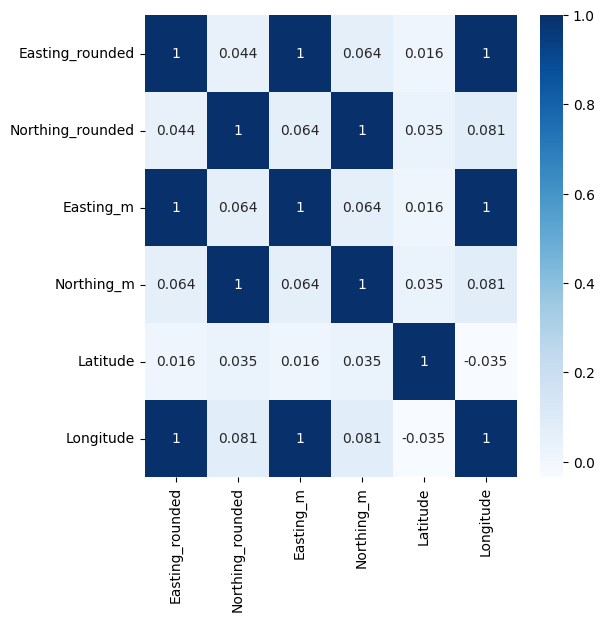

In [ ]:
# Création d'un DataFrame avec ces 7 colonnes pour observer les correlations et etudier la suppression de certaines d'entre elles

df_coord = pompier_alldata_new.loc [:,["Easting_rounded","Northing_rounded","Easting_m","Northing_m","Latitude","Longitude","Postcode_full"]]
display (df_coord.head(10))

# Observation des corrélations
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(df_coord.corr(), annot = True, cmap = "Blues");


# Conclusion :
# Easting_m et Longitude sont corrélées à 100% avec Easting_rounded
# Northing_m est corrélées à 100% avec Northing_rounded

In [ ]:
#Suppression des colonnes
pompier_alldata_new.drop(["Easting_m","Northing_m","Latitude","Longitude","Postcode_full"], axis = 1, inplace = True)
pompier_alldata_new.info()


<ipython-input-7-b9664eb46b7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pompier_alldata_new.drop(["Easting_m","Northing_m","Latitude","Longitude","Postcode_full"], axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 942502 entries, 1157824 to 2100325
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   IncidentNumber                         942502 non-null  object 
 1   DateOfCall                             942502 non-null  object 
 2   CalYear                                942502 non-null  int64  
 3   TimeOfCall                             942502 non-null  object 
 4   HourOfCall                             942502 non-null  int64  
 5   IncidentGroup                          942502 non-null  object 
 6   StopCodeDescription                    942502 non-null  object 
 7   SpecialServiceType                     206917 non-null  object 
 8   PropertyCategory                       942502 non-null  object 
 9   PropertyType                           942502 non-null  object 
 10  AddressQualifier                       942502 non

In [ ]:
# Visualisation des na des colonnnes de gélolocalisation, elles ont toutes les 3 le même taux de na
display (pompier_alldata_new.loc [pompier_alldata_new["IncGeo_WardCode"].isna()])
display (pompier_alldata_new.loc [pompier_alldata_new["IncGeo_WardName"].isna()])
display (pompier_alldata_new.loc [pompier_alldata_new["IncGeo_WardNameNew"].isna()])

# Nous avons 4 lignes, qui concernent toutes le meme incident

# ===> Suppression de ces lignes dans la cellule suivante

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1835528,081699-01072021,01 Jul 2021,2021,00:42:57,0,False Alarm,AFA,NaN,Non Residential,Single shop,...,30/06/2021 23:44:05,30/06/2021 23:47:29,68.0,204.0,272,30/06/2021 23:51:46,Dowgate,Home Station,1,Initial Mobilisation
1981915,069455-15052022,15 May 2022,2022,13:08:36,13,Special Service,Special Service,Other Transport incident,Road Vehicle,Bicycle,...,15/05/2022 12:09:57,15/05/2022 12:10:03,5.0,6.0,11,15/05/2022 14:04:56,Stoke Newington,Home Station,1,Initial Mobilisation
1997322,087558-17062022,17 Jun 2022,2022,04:08:23,4,Special Service,Special Service,RTC,Road Vehicle,Car,...,17/06/2022 03:09:52,17/06/2022 03:19:01,89.0,549.0,638,17/06/2022 03:40:52,Bexley,Home Station,2,Initial Mobilisation
1997323,087558-17062022,17 Jun 2022,2022,04:08:23,4,Special Service,Special Service,RTC,Road Vehicle,Car,...,17/06/2022 03:09:48,17/06/2022 03:18:34,85.0,526.0,611,17/06/2022 03:22:44,Erith,Home Station,1,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1835528,081699-01072021,01 Jul 2021,2021,00:42:57,0,False Alarm,AFA,NaN,Non Residential,Single shop,...,30/06/2021 23:44:05,30/06/2021 23:47:29,68.0,204.0,272,30/06/2021 23:51:46,Dowgate,Home Station,1,Initial Mobilisation
1981915,069455-15052022,15 May 2022,2022,13:08:36,13,Special Service,Special Service,Other Transport incident,Road Vehicle,Bicycle,...,15/05/2022 12:09:57,15/05/2022 12:10:03,5.0,6.0,11,15/05/2022 14:04:56,Stoke Newington,Home Station,1,Initial Mobilisation
1997322,087558-17062022,17 Jun 2022,2022,04:08:23,4,Special Service,Special Service,RTC,Road Vehicle,Car,...,17/06/2022 03:09:52,17/06/2022 03:19:01,89.0,549.0,638,17/06/2022 03:40:52,Bexley,Home Station,2,Initial Mobilisation
1997323,087558-17062022,17 Jun 2022,2022,04:08:23,4,Special Service,Special Service,RTC,Road Vehicle,Car,...,17/06/2022 03:09:48,17/06/2022 03:18:34,85.0,526.0,611,17/06/2022 03:22:44,Erith,Home Station,1,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1835528,081699-01072021,01 Jul 2021,2021,00:42:57,0,False Alarm,AFA,NaN,Non Residential,Single shop,...,30/06/2021 23:44:05,30/06/2021 23:47:29,68.0,204.0,272,30/06/2021 23:51:46,Dowgate,Home Station,1,Initial Mobilisation
1981915,069455-15052022,15 May 2022,2022,13:08:36,13,Special Service,Special Service,Other Transport incident,Road Vehicle,Bicycle,...,15/05/2022 12:09:57,15/05/2022 12:10:03,5.0,6.0,11,15/05/2022 14:04:56,Stoke Newington,Home Station,1,Initial Mobilisation
1997322,087558-17062022,17 Jun 2022,2022,04:08:23,4,Special Service,Special Service,RTC,Road Vehicle,Car,...,17/06/2022 03:09:52,17/06/2022 03:19:01,89.0,549.0,638,17/06/2022 03:40:52,Bexley,Home Station,2,Initial Mobilisation
1997323,087558-17062022,17 Jun 2022,2022,04:08:23,4,Special Service,Special Service,RTC,Road Vehicle,Car,...,17/06/2022 03:09:48,17/06/2022 03:18:34,85.0,526.0,611,17/06/2022 03:22:44,Erith,Home Station,1,Initial Mobilisation


In [ ]:
# suppression de ces lignes
pompier_alldata_new = pompier_alldata_new.dropna (axis =0,how = "all", subset = ["IncGeo_WardCode","IncGeo_WardName","IncGeo_WardNameNew"])

In [ ]:
# Autres colonnes contenant des variables catégorielles contenant + de 10 catégories ayant un taux de na < 0,0025 % - Supression des lignes concernées

# IncidentStationGround : 2 lignes contiennent des na
display (pompier_alldata_new.loc [pompier_alldata_new["IncidentStationGround"].isna()])

# FirstPumpArriving_DeployedFromStation : 22 lignes contiennent des na
display (pompier_alldata_new.loc [pompier_alldata_new["FirstPumpArriving_DeployedFromStation"].isna()])

# NumCalls : 23 lignes contiennent des na
display (pompier_alldata_new.loc [pompier_alldata_new["NumCalls"].isna()])

# DeployedFromStation_Name : 17 lignes contiennent des na
display (pompier_alldata_new.loc [pompier_alldata_new["DeployedFromStation_Name"].isna()])

# DeployedFromLocation : 798 lignes contienne des na - 0,084% - on suprrimera également ces lignes


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1977424,064082-05052022,05 May 2022,2022,20:01:20,20,False Alarm,False alarm - Good intent,NaN,Non Residential,Leisure Centre,...,05/05/2022 19:04:01,05/05/2022 19:06:43,64.0,162.0,226,05/05/2022 19:19:28,Addington,Home Station,1,Initial Mobilisation
1977425,064082-05052022,05 May 2022,2022,20:01:20,20,False Alarm,False alarm - Good intent,NaN,Non Residential,Leisure Centre,...,05/05/2022 19:04:10,05/05/2022 19:10:45,73.0,395.0,468,05/05/2022 19:16:01,Biggin Hill,Home Station,2,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1179292,025044-28022017,28 Feb 2017,2017,13:32:44,13,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,28/02/2017 13:41:50,28/02/2017 13:49:20,544.0,450.0,994,28/02/2017 14:20:26,NaN,NaN,1,Initial Mobilisation
1203136,051812-25042017,02 May 2017,2017,20:01:00,20,Special Service,Special Service,Effecting entry/exit,Dwelling,House - single occupancy,...,25/04/2017 19:01:00,25/04/2017 19:02:00,NaN,60.0,60,26/04/2017 20:43:33,NaN,NaN,1,Initial Mobilisation
1208363,061624-16052017,16 May 2017,2017,19:40:15,19,False Alarm,False alarm - Good intent,NaN,Dwelling,House - single occupancy,...,NaN,16/05/2017 18:40:52,NaN,NaN,0,16/05/2017 18:43:55,Plumstead,Home Station,1,Initial Mobilisation
1303568,173261-27122017,27 Dec 2017,2017,12:22:09,12,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,27/12/2017 12:23:01,NaN,NaN,0,27/12/2017 12:38:43,Norbury,Home Station,1,Initial Mobilisation
1338790,037491-26032018,26 Mar 2018,2018,05:11:31,5,Special Service,Special Service,Flooding,Other Residential,Hotel/motel,...,NaN,26/03/2018 04:28:02,NaN,NaN,0,26/03/2018 06:09:54,Paddington,Home Station,1,Initial Mobilisation
1381016,088982-04072018,04 Jul 2018,2018,19:47:46,19,False Alarm,AFA,NaN,Dwelling,House - single occupancy,...,NaN,04/07/2018 18:47:47,NaN,NaN,0,04/07/2018 18:55:20,Bexley,Home Station,1,Initial Mobilisation
1391553,104010-25072018,25 Jul 2018,2018,13:25:02,13,Fire,Primary Fire,NaN,Non Residential,Takeaway/ fast food,...,25/07/2018 12:38:19,25/07/2018 12:44:06,159.0,347.0,506,25/07/2018 13:01:08,NaN,Other Station,1,Initial Mobilisation
1664898,056467-13052020,13 May 2020,2020,19:28:57,19,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,13/05/2020 18:29:15,13/05/2020 18:31:42,59.0,147.0,206,13/05/2020 18:40:36,NaN,NaN,1,Initial Mobilisation
1664899,056467-13052020,13 May 2020,2020,19:28:57,19,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,13/05/2020 18:29:59,13/05/2020 18:31:53,62.0,114.0,176,13/05/2020 18:41:50,Euston,Home Station,2,Initial Mobilisation
1664900,056467-13052020,13 May 2020,2020,19:28:57,19,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,13/05/2020 18:29:40,13/05/2020 18:33:54,43.0,254.0,297,13/05/2020 18:34:06,Islington,Home Station,3,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1289397,157714-23112017,23 Nov 2017,2017,18:28:41,18,False Alarm,False alarm - Good intent,NaN,Outdoor Structure,Small refuse/rubbish container,...,23/11/2017 18:30:30,23/11/2017 18:36:14,108.0,344.0,452,23/11/2017 18:44:40,Lambeth,Home Station,1,Initial Mobilisation
1289688,158081-24112017,24 Nov 2017,2017,17:12:09,17,Special Service,Special Service,No action (not false alarm),Outdoor,Road surface/pavement,...,24/11/2017 17:31:33,24/11/2017 17:38:52,118.0,439.0,557,NaN,North Kensington,Home Station,1,Initial Mobilisation
1289689,158081-24112017,24 Nov 2017,2017,17:12:09,17,Special Service,Special Service,No action (not false alarm),Outdoor,Road surface/pavement,...,24/11/2017 17:30:30,24/11/2017 17:43:21,55.0,771.0,826,NaN,Chelsea,Home Station,2,Initial Mobilisation
1289690,158081-24112017,24 Nov 2017,2017,17:12:09,17,Special Service,Special Service,No action (not false alarm),Outdoor,Road surface/pavement,...,24/11/2017 17:30:46,24/11/2017 17:47:55,71.0,1029.0,1100,NaN,Lambeth,Home Station,4,Initial Mobilisation
1289691,158081-24112017,24 Nov 2017,2017,17:12:09,17,Special Service,Special Service,No action (not false alarm),Outdoor,Road surface/pavement,...,24/11/2017 17:31:16,24/11/2017 17:45:57,101.0,881.0,982,NaN,West Hampstead,Home Station,3,Initial Mobilisation
1289709,158098-24112017,24 Nov 2017,2017,17:43:54,17,Special Service,Special Service,No action (not false alarm),Non Residential,Fire station,...,NaN,24/11/2017 18:00:00,NaN,NaN,442,24/11/2017 18:02:54,North Kensington,Home Station,4,Initial Mobilisation
1289710,158098-24112017,24 Nov 2017,2017,17:43:54,17,Special Service,Special Service,No action (not false alarm),Non Residential,Fire station,...,NaN,24/11/2017 17:58:00,NaN,NaN,309,24/11/2017 18:05:51,Chelsea,Home Station,3,Initial Mobilisation
1289711,158098-24112017,24 Nov 2017,2017,17:43:54,17,Special Service,Special Service,No action (not false alarm),Non Residential,Fire station,...,NaN,24/11/2017 17:53:55,NaN,NaN,55,24/11/2017 18:17:43,Hammersmith,Home Station,1,Initial Mobilisation
1289712,158098-24112017,24 Nov 2017,2017,17:43:54,17,Special Service,Special Service,No action (not false alarm),Non Residential,Fire station,...,NaN,24/11/2017 18:10:00,NaN,NaN,1006,24/11/2017 18:18:25,Lambeth,Home Station,5,Initial Mobilisation
1289713,158098-24112017,24 Nov 2017,2017,17:43:54,17,Special Service,Special Service,No action (not false alarm),Non Residential,Fire station,...,NaN,24/11/2017 17:54:30,NaN,NaN,62,24/11/2017 18:15:06,West Hampstead,Home Station,2,Initial Mobilisation


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Description
1179292,025044-28022017,28 Feb 2017,2017,13:32:44,13,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,28/02/2017 13:41:50,28/02/2017 13:49:20,544.0,450.0,994,28/02/2017 14:20:26,NaN,NaN,1,Initial Mobilisation
1203136,051812-25042017,02 May 2017,2017,20:01:00,20,Special Service,Special Service,Effecting entry/exit,Dwelling,House - single occupancy,...,25/04/2017 19:01:00,25/04/2017 19:02:00,NaN,60.0,60,26/04/2017 20:43:33,NaN,NaN,1,Initial Mobilisation
1365619,069111-31052018,31 May 2018,2018,20:46:56,20,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,31/05/2018 19:48:54,31/05/2018 19:53:30,55.0,276.0,331,31/05/2018 19:56:57,NaN,NaN,3,Initial Mobilisation
1375530,081088-24062018,24 Jun 2018,2018,02:23:02,2,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),...,24/06/2018 01:24:54,24/06/2018 01:33:08,94.0,494.0,588,24/06/2018 01:43:35,NaN,NaN,3,Initial Mobilisation
1391553,104010-25072018,25 Jul 2018,2018,13:25:02,13,Fire,Primary Fire,NaN,Non Residential,Takeaway/ fast food,...,25/07/2018 12:38:19,25/07/2018 12:44:06,159.0,347.0,506,25/07/2018 13:01:08,NaN,Other Station,1,Initial Mobilisation
1424328,143448-09102018,09 Oct 2018,2018,08:11:46,8,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,09/10/2018 07:12:50,09/10/2018 07:17:01,63.0,251.0,314,09/10/2018 07:18:08,NaN,NaN,2,Initial Mobilisation
1434652,155294-02112018,02 Nov 2018,2018,17:52:25,17,Fire,Primary Fire,NaN,Road Vehicle,Car,...,02/11/2018 17:54:07,02/11/2018 18:03:15,93.0,548.0,641,02/11/2018 18:09:30,NaN,NaN,2,Initial Mobilisation
1445652,167860-28112018,28 Nov 2018,2018,23:18:03,23,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,28/11/2018 23:20:03,28/11/2018 23:23:49,93.0,226.0,319,28/11/2018 23:25:38,NaN,NaN,2,Initial Mobilisation
1445653,167860-28112018,28 Nov 2018,2018,23:18:03,23,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,28/11/2018 23:19:21,28/11/2018 23:24:06,51.0,285.0,336,28/11/2018 23:27:04,NaN,NaN,3,Initial Mobilisation
1655721,046770-19042020,19 Apr 2020,2020,09:12:17,9,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,19/04/2020 08:14:26,19/04/2020 08:16:57,43.0,151.0,194,19/04/2020 08:21:11,NaN,NaN,2,Initial Mobilisation


In [ ]:
# suppression de ces lignes
pompier_alldata_new = pompier_alldata_new.dropna (axis =0,how = "any", subset = ["IncidentStationGround","FirstPumpArriving_DeployedFromStation","NumCalls","DeployedFromStation_Name","DeployedFromLocation"])

In [ ]:
# la colonne "Special Service Type" contient 78% de nan.
# il n'y a une valeur renseignée dans cette colonne que lorsque la valeur renseignée dans "STopCode Descritption" est la valeur "Special Service".
# remplacement ces nan par la valeur "Not_concerned" puisque c'est une variable de type objet
pompier_alldata_new ["SpecialServiceType"] = pompier_alldata_new["SpecialServiceType"].fillna("Not_concerned")



<Axes: xlabel='Notional Cost (£)'>

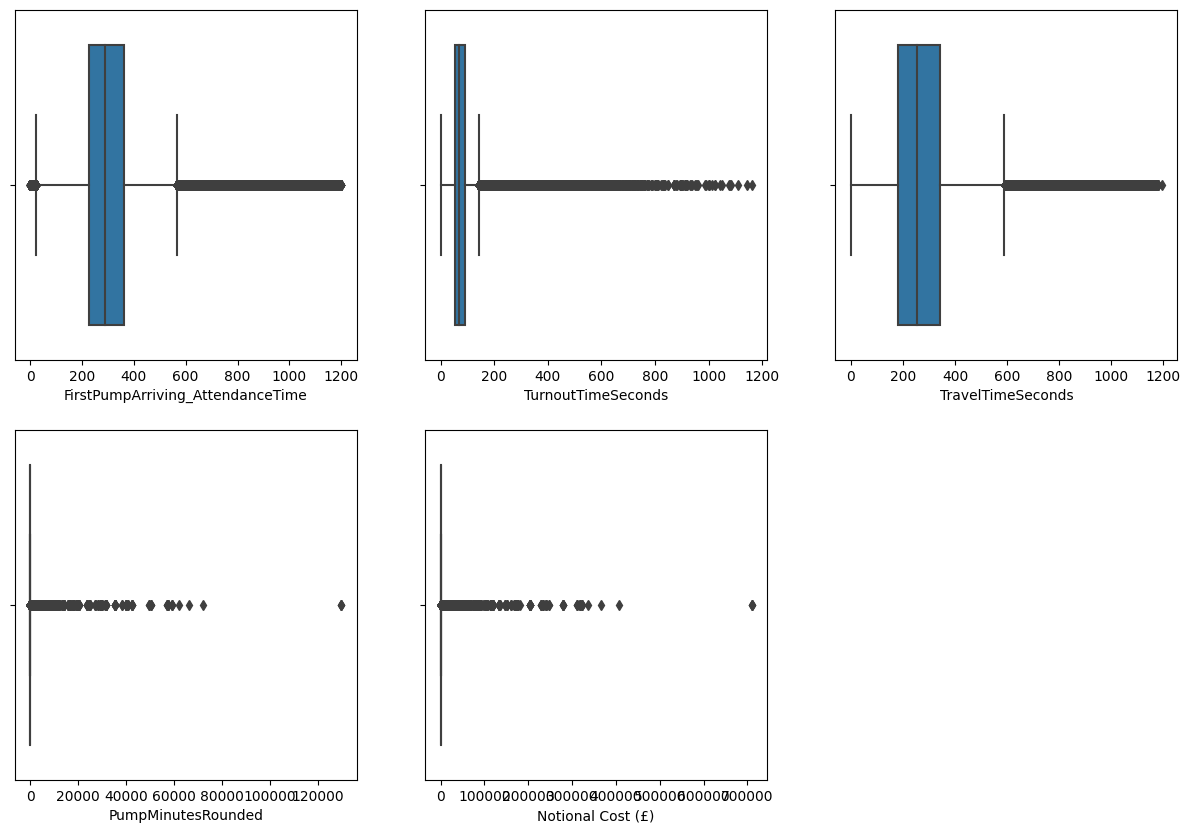

In [ ]:
# Gestion des NAN pour les colonnes FirstPumpArriving_AttendanceTime; TurnOutTimeSeconds, TravelTimesSeconds,PumpMinutesRounded, Notional Cost (£)
# Ce sont des variable numériques, remplacement des nan par la moyenne ou la médiane

med_FPA = pompier_alldata_new["FirstPumpArriving_AttendanceTime"].median()
pompier_alldata_new ["FirstPumpArriving_AttendanceTime"] = pompier_alldata_new["FirstPumpArriving_AttendanceTime"].fillna(med_FPA)

median_value = pompier_alldata_new['TurnoutTimeSeconds'].median()
pompier_alldata_new['TurnoutTimeSeconds'] = pompier_alldata_new['TurnoutTimeSeconds'].fillna(median_value)

median_value2 = pompier_alldata_new['TravelTimeSeconds'].median()
pompier_alldata_new['TravelTimeSeconds'] = pompier_alldata_new['TravelTimeSeconds'].fillna(median_value2)


med_PMR = pompier_alldata_new["PumpMinutesRounded"].median()
pompier_alldata_new ["PumpMinutesRounded"] = pompier_alldata_new["PumpMinutesRounded"].fillna(med_PMR)

median_value3 = pompier_alldata_new["Notional Cost (£)"].median()
pompier_alldata_new["Notional Cost (£)"] = pompier_alldata_new["Notional Cost (£)"].fillna(median_value3)


plt.figure (figsize = (15,10))

plt.subplot (2,3,1)
sns.boxplot(x=pompier_alldata_new["FirstPumpArriving_AttendanceTime"])

plt.subplot (2,3,2)
sns.boxplot(x=pompier_alldata_new["TurnoutTimeSeconds"])

plt.subplot (2,3,3)
sns.boxplot(x=pompier_alldata_new["TravelTimeSeconds"])

plt.subplot (2,3,4)
sns.boxplot(x=pompier_alldata_new["PumpMinutesRounded"])

plt.subplot (2,3,5)
sns.boxplot(x=pompier_alldata_new["Notional Cost (£)"])

Standardisation des données : vérification des types de variables

In [ ]:
# dates et valeurs temporelles ---> à mettre au format datetime
pompier_alldata_new['DateOfCall']= pd.to_datetime(pompier_alldata_new['DateOfCall'])

pompier_alldata_new['TimeOfCall']= pd.to_datetime(pompier_alldata_new['TimeOfCall'])
pompier_alldata_new['TimeOfCall']= pompier_alldata_new['TimeOfCall'].dt.time

pompier_alldata_new['DateAndTimeMobilised']= pd.to_datetime(pompier_alldata_new['DateAndTimeMobilised'])

pompier_alldata_new['DateAndTimeMobile']= pd.to_datetime(pompier_alldata_new['DateAndTimeMobile'])

pompier_alldata_new['DateAndTimeArrived']= pd.to_datetime(pompier_alldata_new['DateAndTimeArrived'])

pompier_alldata_new['DateAndTimeLeft']= pd.to_datetime(pompier_alldata_new['DateAndTimeLeft'])



Bilan du nettoyage des données

In [ ]:
percentage_missing_values=pompier_alldata_new.isna().mean() * 100
print (percentage_missing_values)

# à ce stade, il reste 2 colonnes contenant des valeurs manquantes. Attention à leur usage par la suite

display (pompier_alldata_new.info())

IncidentNumber                           0.000000
DateOfCall                               0.000000
CalYear                                  0.000000
TimeOfCall                               0.000000
HourOfCall                               0.000000
IncidentGroup                            0.000000
StopCodeDescription                      0.000000
SpecialServiceType                       0.000000
PropertyCategory                         0.000000
PropertyType                             0.000000
AddressQualifier                         0.000000
Postcode_district                        0.000000
UPRN                                     0.000000
USRN                                     0.000000
IncGeo_BoroughCode                       0.000000
IncGeo_BoroughName                       0.000000
IncGeo_WardCode                          0.000000
IncGeo_WardName                          0.000000
IncGeo_WardNameNew                       0.000000
Easting_rounded                          0.000000


None

<ipython-input-18-4e6567ac4457>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice = pompier_alldata_new.corr()


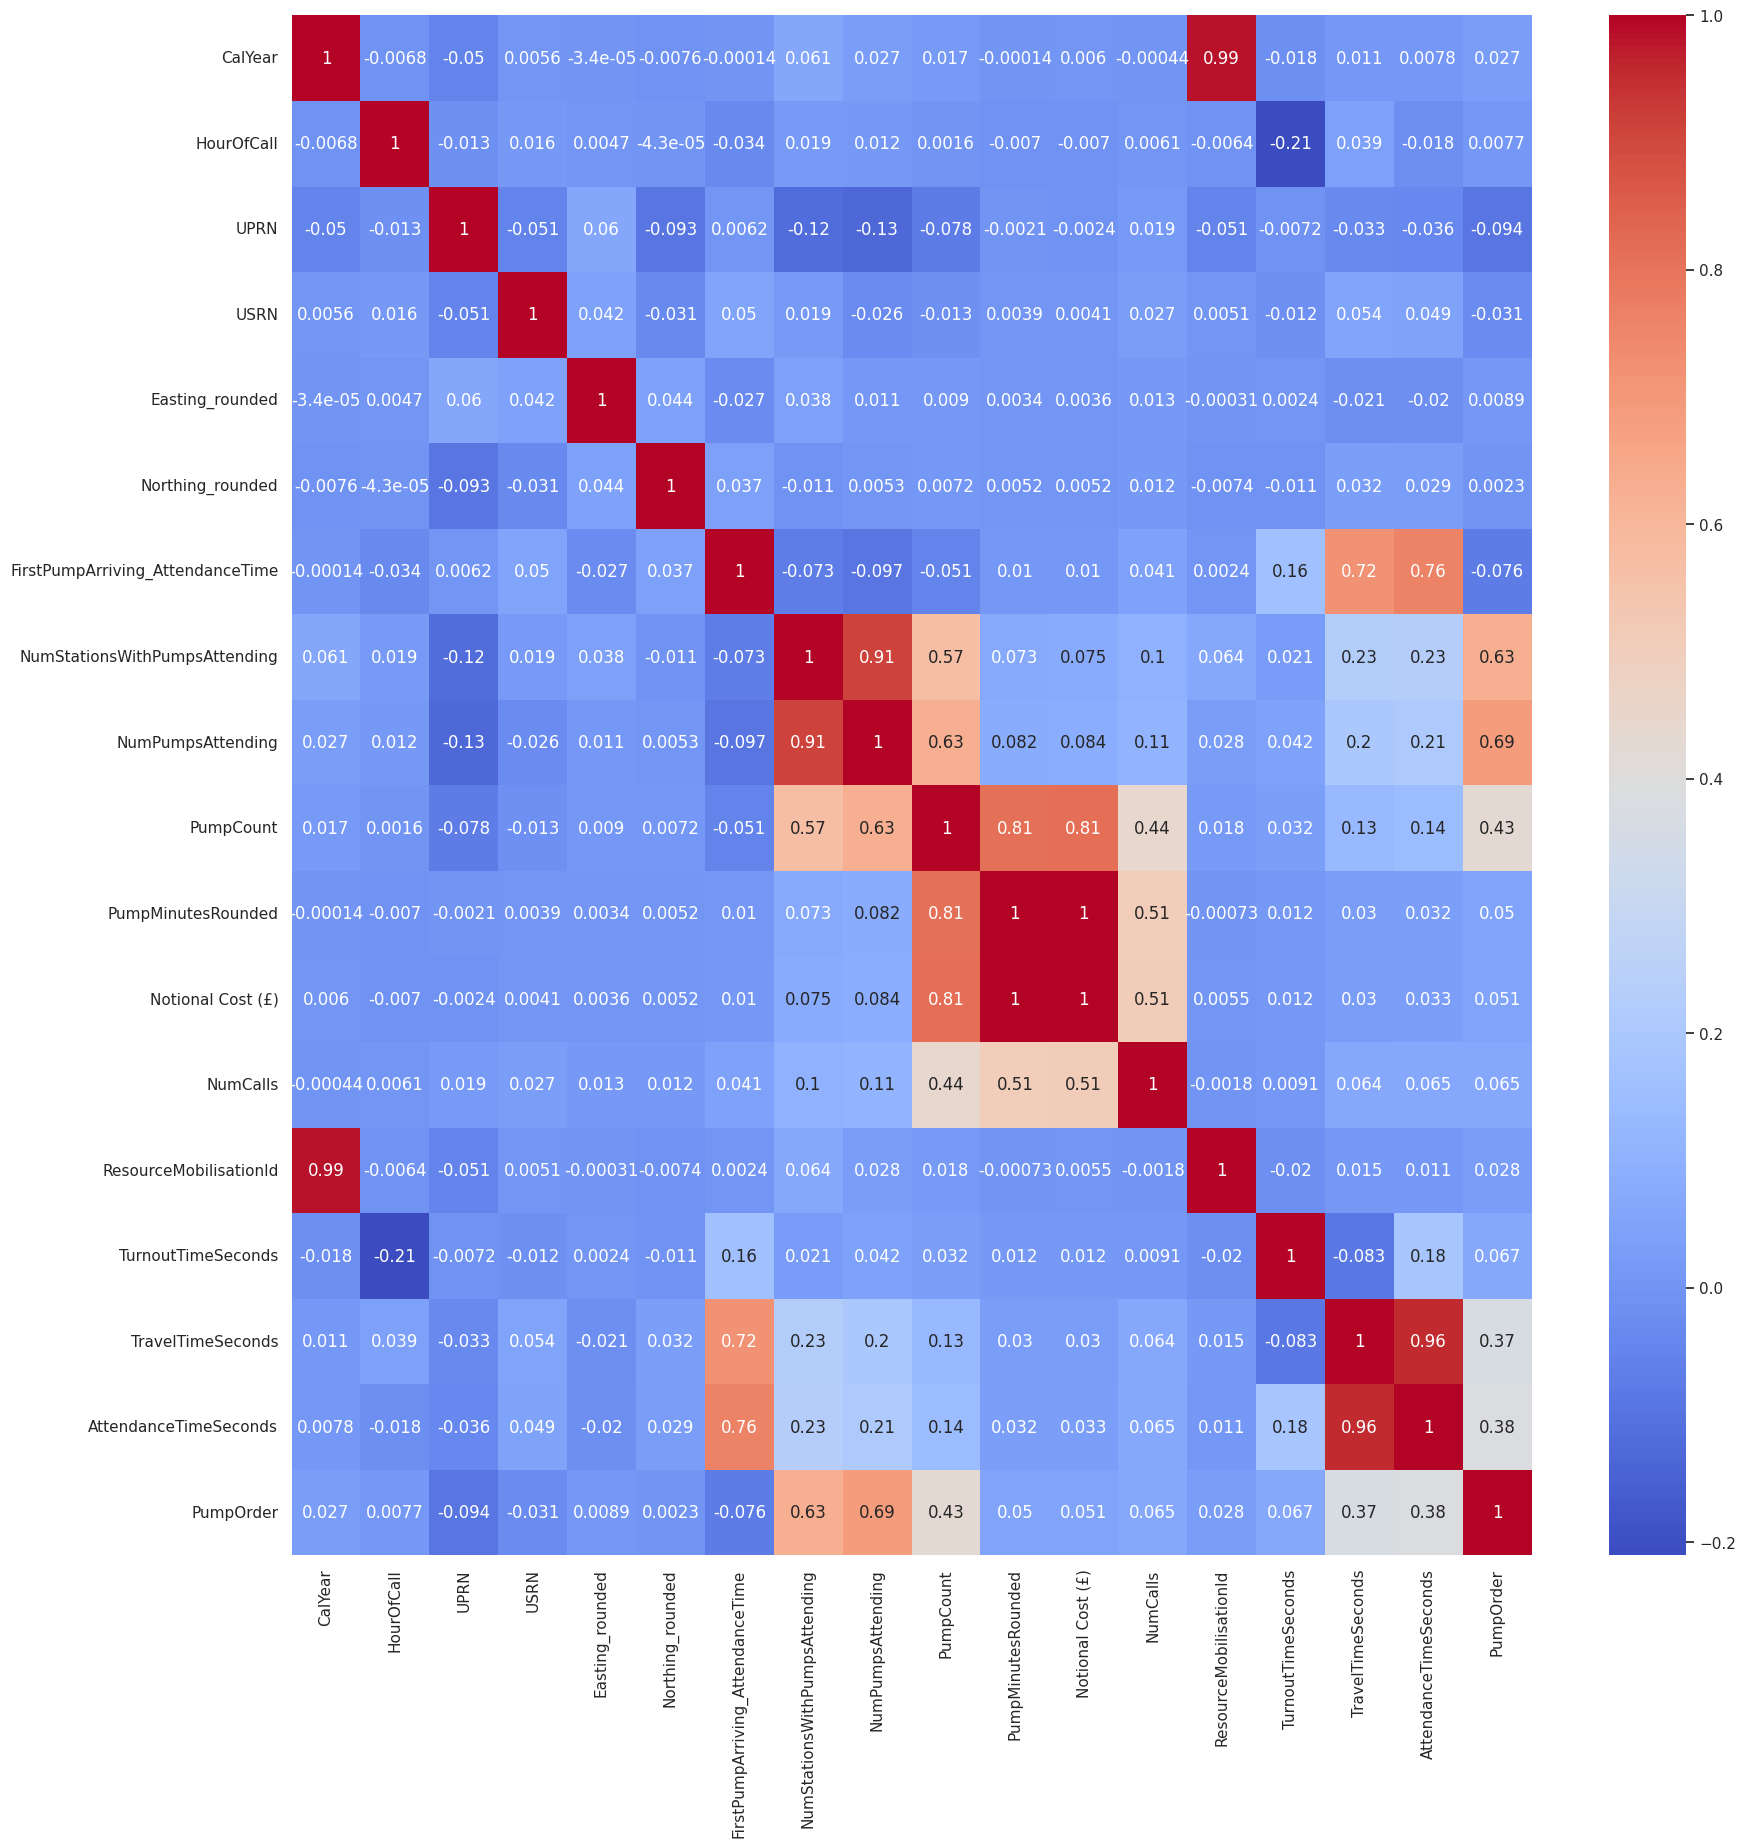

In [ ]:
#Affichage d'une matrice de correlation pour vérifier les relations entre les variable quantitatives et ainsi voir s'il ne nous reste pas
#de variables qui seraient trop corrélées

import seaborn as sns
sns.set_theme()

matrice = pompier_alldata_new.corr()
fig,ax = plt.subplots (figsize = (20,20))
sns.heatmap (matrice, annot = True, cmap = "coolwarm");

In [ ]:
# On observe que TravelTimeSeconds et AttendanceTimeSeconds sont fortement corrélées.
# On va vérifier que AttendanceTimeSeconds correspond à la somme TurnoutTimeSeconds + TravelTimeSeconds, soit le Délai d'intervetion

pompier_alldata_new["DelaiIntervention"] = pompier_alldata_new["TurnoutTimeSeconds"] + pompier_alldata_new["TravelTimeSeconds"]

display (pompier_alldata_new["DelaiIntervention"].head(),pompier_alldata_new["AttendanceTimeSeconds"].head() )
display (pompier_alldata_new["DelaiIntervention"].describe(),pompier_alldata_new["AttendanceTimeSeconds"].describe())

1157824    835.0
1157825    237.0
1157826    282.0
1157827    415.0
1157828    420.0
Name: DelaiIntervention, dtype: float64

1157824    835
1157825    237
1157826    282
1157827    415
1157828    420
Name: AttendanceTimeSeconds, dtype: int64

count    941660.000000
mean        350.177846
std         147.991050
min           1.000000
25%         253.000000
50%         326.000000
75%         419.000000
max        1200.000000
Name: DelaiIntervention, dtype: float64

count    941660.000000
mean        349.033851
std         149.460256
min           1.000000
25%         252.000000
50%         326.000000
75%         419.000000
max        1200.000000
Name: AttendanceTimeSeconds, dtype: float64

In [ ]:
# Les deux colonnes sont bien les mêmes, les legères différences s'expliquent par la gestion des valeurs manquantes appliquée à TravelTimeSeconds et TurnoutTimeSeconds
# Nous allons donc supprimer cette nouvelle colonne "DelaiIntervetion" et renommer la colonne "AttendanceTimeSeconds" en "Délai d'intervention"
pompier_alldata_new.drop ("DelaiIntervention", axis=1, inplace=True)
pompier_alldata_new = pompier_alldata_new.rename (columns = {"AttendanceTimeSeconds" : "DelaiIntervention"})
pompier_alldata_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941660 entries, 1157824 to 2100325
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   IncidentNumber                         941660 non-null  object        
 1   DateOfCall                             941660 non-null  datetime64[ns]
 2   CalYear                                941660 non-null  int64         
 3   TimeOfCall                             941660 non-null  object        
 4   HourOfCall                             941660 non-null  int64         
 5   IncidentGroup                          941660 non-null  object        
 6   StopCodeDescription                    941660 non-null  object        
 7   SpecialServiceType                     941660 non-null  object        
 8   PropertyCategory                       941660 non-null  object        
 9   PropertyType                           94

Data Visualization

Nombre d'accidents par année

In [ ]:

import plotly.graph_objects as go

Nombre_incident_annee= pompier_alldata_new.groupby(['CalYear']).agg({'IncidentNumber':'count'}).reset_index()
print (Nombre_incident_annee )

fig=go.Figure()
fig.add_traces(go.Scatter(x= Nombre_incident_annee['CalYear'], y=Nombre_incident_annee['IncidentNumber']))
fig.update_layout(title="Nombre d'incidents par année", xaxis_title='Années', yaxis_title="Nombre d'incidents")
fig.show()

   CalYear  IncidentNumber
0     2017          147445
1     2018          152984
2     2019          154023
3     2020          149732
4     2021          158393
5     2022          179083


In [ ]:
#Analyse Stat
# Les Hypothèses
# H0 : les variables nombre d'incidents et années sont indépendantes
# H1 : les variables sont dépendantes
import statsmodels.api
result = statsmodels.formula.api.ols('IncidentNumber ~ CalYear', data= Nombre_incident_annee).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

# p values > 0.05 donc H0 est vrai
# Le nombre d'incidents ne depend pas de l'année

,df,sum_sq,mean_sq,F,PR(>F)
CalYear,1.0,4.134694e+08,4.134694e+08,6.744372,0.060239
Residual,4.0,2.452233e+08,6.130583e+07,NaN,NaN


Nombre d'incidents par mois selon l'année

In [ ]:
pompier_alldata_new['Month']= pompier_alldata_new['DateOfCall'].dt.month


In [ ]:
Nbs= pompier_alldata_new.groupby(['Month', 'CalYear']).agg({'IncidentNumber':'count'}).reset_index()
Nbs['Month'] = Nbs['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                    ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août',
                                     'Septembre', 'Octobre', 'Novembre', 'Décembre'])
print (Nbs)

       Month  CalYear  IncidentNumber
0    Janvier     2017           11498
1    Janvier     2018           11320
2    Janvier     2019           11534
3    Janvier     2020           11977
4    Janvier     2021           11233
..       ...      ...             ...
67  Décembre     2018           12117
68  Décembre     2019           12833
69  Décembre     2020           12071
70  Décembre     2021           13814
71  Décembre     2022           17180

[72 rows x 3 columns]


In [ ]:

import plotly.express as px

fig= px.line(Nbs, x='Month', y='IncidentNumber', color='CalYear')
fig.update_layout(
    title="Nombre d'incidents par mois",
    xaxis_title='Mois',
    yaxis_title="Nombre d'incidents")
fig.show()


In [ ]:
# Observations : On observe que le nombre d'incidents varie selon le mois : pics en juillet et en décembre.

Nombre d'interventions par année selon le type

In [ ]:
Nbs_type= pompier_alldata_new.groupby(['CalYear','IncidentGroup']).agg({'IncidentNumber':'count'}).reset_index()
print (Nbs_type )

    CalYear    IncidentGroup  IncidentNumber
0      2017      False Alarm           86103
1      2017             Fire           30708
2      2017  Special Service           30634
3      2018      False Alarm           90207
4      2018             Fire           30648
5      2018  Special Service           32129
6      2019      False Alarm           93374
7      2019             Fire           28454
8      2019  Special Service           32195
9      2020      False Alarm           92131
10     2020             Fire           27716
11     2020  Special Service           29885
12     2021      False Alarm           96151
13     2021             Fire           24434
14     2021  Special Service           37808
15     2022      False Alarm          105279
16     2022             Fire           29727
17     2022  Special Service           44077


In [ ]:
import plotly.express as px

fig = px.bar(Nbs_type, y='IncidentNumber', x='CalYear', color='IncidentGroup')
fig.update_layout(
    title='Nombre d\'incidents par année en fonction du type',
    xaxis_title='Année',
    yaxis_title="Nombre d'incidents")
fig.show()

Répartition du nombre d'incidents selon le type

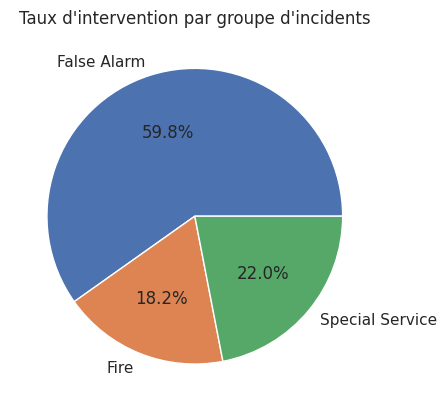

In [ ]:

# Calcul du taux d'intervention par groupe d'incidents
intervention_rate = pompier_alldata_new.groupby('IncidentGroup')['IncidentNumber'].count().reset_index()

# Création du graphique à secteurs
plt.pie(intervention_rate['IncidentNumber'], labels=intervention_rate['IncidentGroup'], autopct='%1.1f%%')

# Ajout du titre
plt.title('Taux d\'intervention par groupe d\'incidents')

# Affichage du graphique à secteurs
plt.show()

In [ ]:
# Les pompiers répondent majoritairement à des fausses alarmes

Répartition des types d'incidents pour la catégorie Special service

In [ ]:
df_inc= pompier_alldata_new[pompier_alldata_new['IncidentGroup'] == 'Special Service']

df_inc= df_inc.dropna(axis=0,how='any', subset='SpecialServiceType')


In [ ]:
Nb=df_inc.groupby(['SpecialServiceType']).agg({'IncidentNumber':'count'})
print (Nb)

                                 IncidentNumber
SpecialServiceType                             
Advice Only                                3984
Animal assistance incidents                4163
Assist other agencies                      9614
Effecting entry/exit                      46337
Evacuation (no fire)                       1406
Flooding                                  42669
Hazardous Materials incident               6557
Lift Release                               9720
Making Safe (not RTC)                      7260
Medical Incident                           4752
Medical Incident - Co-responder             628
No action (not false alarm)               16758
Not_concerned                                 1
Other Transport incident                   2328
Other rescue/release of persons            2931
RTC                                       36508
Removal of objects from people             3007
Rescue or evacuation from water             774
Spills and Leaks (not RTC)              

In [ ]:
import plotly.express as px

fig = px.pie(Nb, values='IncidentNumber', names=Nb.index, title='Distribution of Special Service Types')
fig.show()

Délai d'intervention moyen

In [ ]:
print("Le delai d'intervention moyen est de :", pompier_alldata_new['DelaiIntervention'].mean(), 'secondes')

Le delai d'intervention moyen est de : 349.0338508591211 secondes


In [ ]:
def secondes_en_minutes_secondes(secondes):
    minutes = secondes // 60
    secondes_restantes = secondes % 60
    return minutes, secondes_restantes

temps_en_secondes = 349

minutes, secondes = secondes_en_minutes_secondes(temps_en_secondes)
print(f"{temps_en_secondes} secondes équivalent à {minutes} minutes et {secondes} secondes.")

349 secondes équivalent à 5 minutes et 49 secondes.


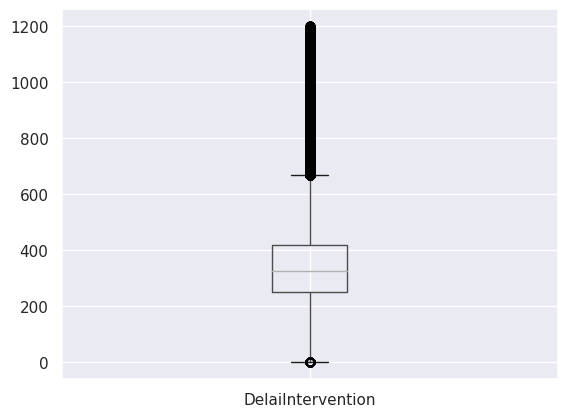

In [ ]:
# Distribution du délai d'intervention
pompier_alldata_new.boxplot('DelaiIntervention')
plt.show()

In [ ]:
pompier_alldata_new["DelaiIntervention"].describe()

count    941660.000000
mean        349.033851
std         149.460256
min           1.000000
25%         252.000000
50%         326.000000
75%         419.000000
max        1200.000000
Name: DelaiIntervention, dtype: float64

Délai d'intervention en fonction de l'année

In [ ]:
pompier_group_year= pompier_alldata_new.groupby('CalYear').agg({'DelaiIntervention':'mean'}).reset_index()
pompier_group_year.head()

import plotly.graph_objects as go
fig=go.Figure()
fig.add_traces(go.Scatter(x= pompier_group_year['CalYear'], y=pompier_group_year['DelaiIntervention']))
fig.update_layout(title="Délai d'intervention selon l'année", xaxis_title='Années', yaxis_title="Délai d'intervention moyen")
fig.show()

In [ ]:
from scipy.stats import f_oneway, kruskal
result_anova = f_oneway(*[group['DelaiIntervention'] for name, group in pompier_alldata_new.groupby('CalYear')])

print("Résultats de l'ANOVA:")
print("Valeur F :", result_anova.statistic)
print("p-valeur :", result_anova.pvalue)

# p values < 0.05 donc H1 est vrai
# Le delai d'intervention  depend de l'année



Résultats de l'ANOVA:
Valeur F : 229.03301394762818
p-valeur : 3.1269172418918683e-245


Delai d'intervention en fonction du mois

In [ ]:
pompier_group_mois= pompier_alldata_new.groupby('Month').agg({'DelaiIntervention':'mean'}).reset_index()
pompier_group_mois['Month'] = pompier_group_mois['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                    ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août',
                                     'Septembre', 'Octobre', 'Novembre', 'Décembre'])
pompier_group_mois.head()

import plotly.graph_objects as go
fig=go.Figure()
fig.add_traces(go.Scatter(x= pompier_group_mois['Month'], y=pompier_group_mois['DelaiIntervention']))
fig.update_layout(title="Delai d'intervention selon le mois", xaxis_title='Mois', yaxis_title="Délai d'intervention moyen")
fig.show()

In [ ]:
from scipy.stats import f_oneway, kruskal

#Analyse Stat
# Les Hypothèses
# H0 : les variables delaiIntervention et mois(1 a 12) sont indépendantes
# H1 : les variables sont dépendantes

result_kruskal = kruskal(*[group['DelaiIntervention'] for name, group in pompier_alldata_new.groupby('Month')])

print("Résultats du test de Kruskal-Wallis:")
print("Statistique de test H :", result_kruskal.statistic)
print("p-valeur :", result_kruskal.pvalue)

# p values < 0.05 donc H1 est vrai
# Le delai d'intervention depend du mois

Résultats du test de Kruskal-Wallis:
Statistique de test H : 1078.8208229748914
p-valeur : 2.0675045498249635e-224


Delai d'intervention en fonction de l'heure

In [ ]:
pompier_group_heures= pompier_alldata_new.groupby('HourOfCall').agg({'DelaiIntervention':'mean'}).reset_index()
pompier_group_heures.head()

import plotly.graph_objects as go
fig=go.Figure()
fig.add_traces(go.Scatter(x= pompier_group_heures['HourOfCall'], y=pompier_group_heures['DelaiIntervention']))
fig.update_layout(title="Delai d'intervention selon l'heure", xaxis_title='Heures', yaxis_title="Délai d'intervention moyen")
fig.show()

In [ ]:
#Analyse Stat
# Les Hypothèses
# H0 : les variables delaiIntervention et heures sont indépendantes
# H1 : les variables sont dépendantes

X = sm.add_constant(pompier_alldata_new['HourOfCall'])  # Ajouter une constante pour l'interception
y = pompier_alldata_new['DelaiIntervention']

model = sm.OLS(y, X).fit()
print(model.summary())

# Le delai d'intervention dépend de l'heure

                            OLS Regression Results                            
Dep. Variable:      DelaiIntervention   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     303.7
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           5.40e-68
Time:                        09:16:04   Log-Likelihood:            -6.0509e+06
No. Observations:              941660   AIC:                         1.210e+07
Df Residuals:                  941658   BIC:                         1.210e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        354.7108      0.360    984.369      0.0

Delai d'intervention en fonction du type d'incidents

In [ ]:
pompier_group_incidents= pompier_alldata_new.groupby('IncidentGroup').agg({'DelaiIntervention':'mean'}).reset_index()
pompier_group_incidents.head()

import plotly.express as px

fig = px.bar(pompier_group_incidents, y='DelaiIntervention', x='IncidentGroup')
fig.update_layout(
    title="Délai d'intervention en fonction du type d'incidents",
    xaxis_title="Type d'incident",
    yaxis_title="Delai moyen d'intervention")
fig.show()

In [ ]:
#Analyse Stat
# Les Hypothèses
# H0 : les variables delai intervention et type de l'incident sont indépendantes
# H1 : les variables sont dépendantes

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the linear regression model
result = smf.ols('DelaiIntervention ~ IncidentGroup', data= pompier_alldata_new).fit()

# Perform ANOVA to analyze the fit of the model
table = sm.stats.anova_lm(result)

# Display the ANOVA table
display(table)

# Le delai d'intervention dépend du type d'incident

,df,sum_sq,mean_sq,F,PR(>F)
IncidentGroup,2.0,9.389813e+07,4.694906e+07,2111.142474,0.0
Residual,941657.0,2.094123e+10,2.223870e+04,NaN,NaN


Délai d'intervention en fonction de l'arrondissement

In [ ]:
pompier_alldata_gr = pompier_alldata_new.groupby('IncGeo_BoroughName').agg({'DelaiIntervention': 'mean'}).reset_index()
pompier_alldata_gr['IncGeo_BoroughName'] = pompier_alldata_gr['IncGeo_BoroughName'] .str.title()
pompier_alldata_gr['IncGeo_BoroughName'] = pompier_alldata_gr['IncGeo_BoroughName'].replace('Barking And Dagenham', 'Barking and Dagenham')

print(pompier_alldata_gr.head())

     IncGeo_BoroughName  DelaiIntervention
0  Barking and Dagenham         372.824889
1                Barnet         381.500437
2                Bexley         375.670699
3                 Brent         376.538033
4               Bromley         386.313674


In [ ]:
import folium
import pandas as pd

print("Delai d'intervention en fonction des quartiers")
print("Zoomer sur la carte ")

# Lien vers le GeoJSON des arrondissements de Londres
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'

world_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='CartoDB positron')

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=pompier_alldata_gr,
    columns=['IncGeo_BoroughName', 'DelaiIntervention'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Delai d'intervention selon les arrondissements de Londres"
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonIntervention.html')
world_map

Delai d'intervention en fonction des quartiers
Zoomer sur la carte 


/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
# Analyse stats
# H0 : Les deux variables sont indépendantes
# H1: Les deux variables sont dépendantes

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the linear regression model
result = smf.ols('DelaiIntervention ~ IncGeo_BoroughName', data=pompier_alldata_new).fit()

# Perform ANOVA to analyze the fit of the model
table = sm.stats.anova_lm(result)

# Display the ANOVA table
display(table)

#p_value < 0.05 donc H1 est vraie
# Le delai d'intervention dépend de l'arrondissement

,df,sum_sq,mean_sq,F,PR(>F)
IncGeo_BoroughName,32.0,6.241396e+08,1.950436e+07,899.801424,0.0
Residual,941627.0,2.041099e+10,2.167630e+04,NaN,NaN


Délai d'intervention en fonction du code postal

In [ ]:

# Création du graphique
pompier_alldata_new_g= pompier_alldata_new.groupby('Postcode_district').agg({'DelaiIntervention':'mean'}).reset_index()
pompier_alldata_new_g.head()

import plotly.express as px
import geopandas as gpd

df = pompier_alldata_new_g
geo_df = gpd.read_file('/content/drive/MyDrive/juin23_bda_pompiers/london_postcodes.json')

merged_df = geo_df.merge(df, right_on="Postcode_district", left_on='Name').set_index("Postcode_district")

fig = px.choropleth(
    merged_df,
    geojson=merged_df.geometry,
    locations=merged_df.index,
    color="DelaiIntervention",
    projection="mercator"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [ ]:
#Analyse Stat
# Les Hypothèses
# H0 : les variables delai intervention et code postal de l'incident sont indépendantes
# H1 : les variables sont dépendantes

import statsmodels.api as sm
import statsmodels.formula.api as smf


result = smf.ols('DelaiIntervention ~ Postcode_district', data= pompier_alldata_new).fit()
table = sm.stats.anova_lm (result)

display(table)



In [ ]:
# p values > 0.05 donc H0 est vrai
# Le délai d'intervention ne dépend pas du code postal

Ajout de l'adresse, code postal, latitude de longitude des casernes

In [ ]:
import numpy as np

station_data = {
    'Plumstead': {
        'Latitude_Station': 51.48747,
        'Longitude_Station': 0.0915,
        'Adress_Station': '1 Lakedale Road',
        'codepostal_Station': 'SE18 1PP'},
    'Euston': {
        'Latitude_Station': 51.527369,
        'Longitude_Station': -0.130674,
        'Adress_Station': '172 Euston Road',
        'codepostal_Station': 'NW1 2DH'},
    'Barking': {
        'Latitude_Station': 51.53001,
        'Longitude_Station': 0.08897,
        'Adress_Station': 'Alfreds Way',
        'codepostal_Station': 'IG11 0BB'},
    'Northolt': {
        'Latitude_Station': 51.55465,
        'Longitude_Station': -0.35957,
        'Adress_Station': "74 Pett's Hill",
        'codepostal_Station': 'UB5 4JT'},
    'Shoreditch':{
        'Latitude_Station': 51.52618,
        'Longitude_Station': -0.085515,
        'Adress_Station': "235 Old Street",
        'codepostal_Station': 'EC1V 9EY'} ,
       'Wembley':{
        'Latitude_Station': 51.5517,
        'Longitude_Station': -0.30402,
        'Adress_Station': "591a Harrow Road",
        'codepostal_Station': 'HA0 2EG'},
      'Ilford':{
        'Latitude_Station': 51.56211,
        'Longitude_Station': 0.09008,
        'Adress_Station': "460 High Road",
        'codepostal_Station': 'IG1 1UE'},
    'Woodford':{
        'Latitude_Station': 51.60955,
        'Longitude_Station': 0.02404,
        'Adress_Station': "2 Snakes Lane West",
        'codepostal_Station': 'IG8 0BS'},
    'North Kensington':{
        'Latitude_Station': 51.52183,
        'Longitude_Station': -0.21221,
        'Adress_Station': "242 Ladbroke Grove",
        'codepostal_Station': 'W10 5LP'},
    'West Hampstead':{
        'Latitude_Station': 51.55168,
        'Longitude_Station': -0.19284,
        'Adress_Station': "327b West End Lane",
        'codepostal_Station': 'NW6 1RS'},
    'Paddington':{
        'Latitude_Station': 51.52009,
        'Longitude_Station': -0.18319,
        'Adress_Station': "156 Harrow Road",
        'codepostal_Station': 'W2 6NL'},
    'Islington':{
        'Latitude_Station': 51.54027,
        'Longitude_Station': -0.10226,
        'Adress_Station': "278 Upper Street",
        'codepostal_Station': 'N1 2TZ'},
    'Stoke Newington': {
        'Latitude_Station': 51.562194,
        'Longitude_Station': -0.076803,
        'Adress_Station': "64 Stoke Newington Church Street",
        'codepostal_Station': 'N16 0AR'},
    'Whitechapel': {
        'Latitude_Station': 51.51527,
        'Longitude_Station': -0.06928,
        'Adress_Station': "27 Commercial Road",
        'codepostal_Station': 'E1 1LD'},
    'Dagenham': {
        'Latitude_Station': 51.559266,
        'Longitude_Station': 0.156838 ,
        'Adress_Station': "70 Rainham Road North",
        'codepostal_Station': 'RM10 7ES'},
    'Romford':{
        'Latitude_Station': 51.5937,
        'Longitude_Station': 0.18114 ,
        'Adress_Station': "198 Pettits Boulevard",
        'codepostal_Station': 'RM1 4PL'},
    'Acton': {
        'Latitude_Station': 51.50704,
        'Longitude_Station': -0.27692 ,
        'Adress_Station': "27 Gunnersbury Lane",
        'codepostal_Station': 'W3 8EA'},
    'Chiswick': {
        'Latitude_Station': 51.4905,
        'Longitude_Station': -0.2691 ,
        'Adress_Station': "2-4 Heathfield Gardens",
        'codepostal_Station': 'W4 4JY'},
    'Hammersmith': {
        'Latitude_Station': 51.49613,
        'Longitude_Station': -0.22428 ,
        'Adress_Station': "190-192 Sheperd Bush Road",
        'codepostal_Station': 'W6 7NL'},
    'Park Royal': {
        'Latitude_Station': 51.53578,
        'Longitude_Station': -0.26482 ,
        'Adress_Station': "15 Waxlow Road",
        'codepostal_Station': 'NW10 7NU'},
    'Tottenham': {
        'Latitude_Station': 51.59232,
        'Longitude_Station': -0.07178 ,
        'Adress_Station': "49 Street Loys Road",
        'codepostal_Station': 'N17 6UE'},
    'Holloway': {
        'Latitude_Station': 51.56154,
        'Longitude_Station': -0.11603 ,
        'Adress_Station': "270-282 Hornsey Road",
        'codepostal_Station': 'N7 7QZ'},
    'Peckham': {
        'Latitude_Station': 51.47389,
        'Longitude_Station': -0.07798 ,
        'Adress_Station': "78-80 Peckham Road",
        'codepostal_Station': 'SE5 8PR'},
    'Millwall': {
        'Latitude_Station': 51.50079,
        'Longitude_Station': -0.02556 ,
        'Adress_Station': "43 Westferry Road",
        'codepostal_Station': 'E14 8JH'},
    'Plaistow': {
        'Latitude_Station': 51.52106,
        'Longitude_Station': 0.0325 ,
        'Adress_Station': "142 Prince Regent Lane",
        'codepostal_Station': 'E13 8RY'},
    'Tooting': {
        'Latitude_Station': 51.43783,
        'Longitude_Station': -0.16271 ,
        'Adress_Station': "1 Trinity Road",
        'codepostal_Station': 'SW17 7SQ'},
    'Woodside': {
        'Latitude_Station': 51.38578,
        'Longitude_Station': -0.06219,
        'Adress_Station': "2 Long Lane",
        'codepostal_Station': 'CR0 7AL'},
    'East Ham': {
        'Latitude_Station': 51.52325,
        'Longitude_Station': 0.05694 ,
        'Adress_Station': "210 High Street South",
        'codepostal_Station': 'E6 3RS'},
      'Chelsea': {
        'Latitude_Station': 51.48716,
        'Longitude_Station': -0.17028,
        'Adress_Station': "264 King's Road",
        'codepostal_Station': 'SW3 5UF'},
    'Kensington': {
        'Latitude_Station': 51.502725,
        'Longitude_Station': -0.189992 ,
        'Adress_Station': "13 Old Center Place",
        'codepostal_Station': 'W8 4PL'},
    'Soho':{
        'Latitude_Station': 51.512652,
        'Longitude_Station': -0.130228,
        'Adress_Station': "126 Shaftesbury Avenue",
        'codepostal_Station': 'W1D 5ET'},
    'Lambeth': {
        'Latitude_Station': 51.49268,
        'Longitude_Station': -0.12122 ,
        'Adress_Station': "8 Albert Embankment",
        'codepostal_Station': 'SE1 7SD'},
    'Battersea': {
        'Latitude_Station': 51.46712,
        'Longitude_Station': -0.16929 ,
        'Adress_Station': "11 Este Road",
        'codepostal_Station': 'SW11 2TL'},
       'Stanmore': {
        'Latitude_Station': 51.60367,
        'Longitude_Station': -0.2976,
        'Adress_Station': "650 Honeypot Lane",
        'codepostal_Station': 'HA7 1JS'},
    'Croydon': {
        'Latitude_Station': 51.36915,
        'Longitude_Station': -0.10547 ,
        'Adress_Station': "90 Old Town",
        'codepostal_Station': 'CR0 1AR'},
    'Wallington': {
        'Latitude_Station': 51.36227,
        'Longitude_Station': -0.1483,
        'Adress_Station': "19 Belmond Road",
        'codepostal_Station': 'SM6 8TE'},
    'Stratford': {
        'Latitude_Station': 51.54378,
        'Longitude_Station': 0.01121 ,
        'Adress_Station': "117 Romford Road",
        'codepostal_Station': 'E15 4EH'},
     'Heston': {
        'Latitude_Station': 51.47501,
        'Longitude_Station': -0.34321 ,
        'Adress_Station': "520 London Road",
        'codepostal_Station': 'TN7 4HR'},
      'Southall': {
        'Latitude_Station': 51.5113,
        'Longitude_Station': -0.37444 ,
        'Adress_Station': "17-18 High Street",
        'codepostal_Station': 'VB1 3HA'},
    'Fulham': {
        'Latitude_Station': 51.47791,
        'Longitude_Station': -0.20094 ,
        'Adress_Station': "685 Fulham Road",
        'codepostal_Station': 'SW6 5UJ'},
    'New Cross': {
        'Latitude_Station': 51.47359,
        'Longitude_Station': -0.04926 ,
        'Adress_Station': "266 Queen's Road",
        'codepostal_Station': 'SE14 5JN'},
    'Wandsworth': {
        'Latitude_Station': 51.45641,
        'Longitude_Station': -0.20141 ,
        'Adress_Station': "45 West Hill",
        'codepostal_Station': 'SW18 1RL'},
    'Southgate': {
        'Latitude_Station': 51.63049,
        'Longitude_Station': -0.12742 ,
        'Adress_Station': "96 High Street",
        'codepostal_Station': 'N14 6BN'},
       'Edmonton': {
        'Latitude_Station': 51.62723,
        'Longitude_Station': -0.06908 ,
        'Adress_Station': "99 Church Street",
        'codepostal_Station': 'N9 9AA'},
     'Hornsey': {
        'Latitude_Station': 51.58651,
        'Longitude_Station': -0.1272 ,
        'Adress_Station': "108 Park Avenue South",
        'codepostal_Station': 'N8 8LS'},
    'Dockhead': {
        'Latitude_Station': 51.50082,
        'Longitude_Station': -0.07081,
        'Adress_Station': "8 Wolseley Street",
        'codepostal_Station': 'SE1 2BP'},
    'Bromley': {
        'Latitude_Station': 51.406856,
        'Longitude_Station': 0.017252 ,
        'Adress_Station': "4 South Street",
        'codepostal_Station': 'BR1 1RM'},
    'Leyton': {
        'Latitude_Station': 51.56313,
        'Longitude_Station': -0.01675 ,
        'Adress_Station': "106 Church Road",
        'codepostal_Station': 'E10 5HG'},
      'Walthamstow': {
        'Latitude_Station': 51.58977,
        'Longitude_Station': -0.02874 ,
        'Adress_Station': "343 Forest Road",
        'codepostal_Station': 'E17 5JR'},
    'Erith': {
        'Latitude_Station': 51.48559,
        'Longitude_Station': 0.15639 ,
        'Adress_Station': "54 Erith Road",
        'codepostal_Station': 'DA17 6HR'},
    'Hornchurch': {
        'Latitude_Station': 51.56458,
        'Longitude_Station': 0.22057 ,
        'Adress_Station': "42 North Street",
        'codepostal_Station': 'RM11 1SH'},
    'West Norwood': {
        'Latitude_Station': 51.42599,
        'Longitude_Station': -0.10554 ,
        'Adress_Station': "210 Knights Hill",
        'codepostal_Station': 'SE27 0QA'},
    'Barnet': {
        'Latitude_Station': 51.64723,
        'Longitude_Station': -0.18598 ,
        'Adress_Station': "144 Station Road",
        'codepostal_Station': 'EN5 1TE'},
     'Deptford': {
        'Latitude_Station': 51.48483,
        'Longitude_Station': -0.03384 ,
        'Adress_Station': "186 Evelyn Street",
        'codepostal_Station': 'SE8 5DB'},
    'Greenwich': {
        'Latitude_Station': 51.47393,
        'Longitude_Station': -0.0137 ,
        'Adress_Station': "4 Blissett Street",
        'codepostal_Station': 'SE10 8UP'},
    'Lewisham': {
        'Latitude_Station': 51.45703,
        'Longitude_Station': -0.01309 ,
        'Adress_Station': "249-259 Lewisham High Street",
        'codepostal_Station': 'SE13 6NH'},
    'Lee Green': {
        'Latitude_Station': 51.456422,
        'Longitude_Station': 0.012536 ,
        'Adress_Station': "9 Eltham Road",
        'codepostal_Station': 'SE12 8ES'},
    'Mitcham': {
        'Latitude_Station': 51.39719,
        'Longitude_Station': -0.17275 ,
        'Adress_Station': "421-445 London Road",
        'codepostal_Station': 'CR4 4BJ'},
      'Biggin Hill': {
        'Latitude_Station': 51.313638,
        'Longitude_Station': 0.034083 ,
        'Adress_Station': "8 Kingsmead",
        'codepostal_Station': 'TN16 3UB'},
    'Harold Hill': {
        'Latitude_Station': 51.59837,
        'Longitude_Station': 0.22361 ,
        'Adress_Station': "Units 8-9, Falcon Business Center",
        'codepostal_Station': 'RM3 8UN'},
    'Sutton': {
        'Latitude_Station': 51.3689,
        'Longitude_Station': 0.2112,
        'Adress_Station': "43 Street Dunstan's Hill",
        'codepostal_Station': 'SM1 2JX'},
     'Kentish Town': {
        'Latitude_Station': 51.55283,
        'Longitude_Station': -0.14169 ,
        'Adress_Station': "20 Highgate Road",
        'codepostal_Station': 'NW5 1NT'},
      'Leytonstone': {
        'Latitude_Station': 51.56062,
        'Longitude_Station': 0.00869 ,
        'Adress_Station': "466 High Road ",
        'codepostal_Station': 'E11 3HN'},
    'Dowgate': {
        'Latitude_Station': 51.51004,
        'Longitude_Station': -0.0901 ,
        'Adress_Station': "94-95 Upper Thames Street",
        'codepostal_Station': 'EC4R 3UE'},
    'Ruislip': {
        'Latitude_Station': 51.58839,
        'Longitude_Station': -0.4367 ,
        'Adress_Station': "8 Reservoir Road",
        'codepostal_Station': 'HA4 7TT'},
    'Shadwell': {
        'Latitude_Station': 51.51095,
        'Longitude_Station': -0.05584,
        'Adress_Station': "290 Cable Street",
        'codepostal_Station': 'E1 0BX'},
     'Poplar' : {
        'Latitude_Station': 51.51092,
        'Longitude_Station': -0.01465 ,
        'Adress_Station': "168 East India Dock Road",
        'codepostal_Station': 'E14 0BP'},
      'Homerton': {
        'Latitude_Station': 51.548508,
        'Longitude_Station': 0.043957 ,
        'Adress_Station': "97 Homerton High Street",
        'codepostal_Station': 'E9 6DL'},
      'Ealing': {
        'Latitude_Station': 51.51209,
        'Longitude_Station': -0.31391,
        'Adress_Station': "60-64 Uxbridge Road",
        'codepostal_Station': 'W13 8RA'},
      'Enfield': {
        'Latitude_Station': 51.660211,
        'Longitude_Station': 0.051895,
        'Adress_Station': "93 Carterhatch Lane",
        'codepostal_Station': 'EN1 4LA'},
      'Wimbledon': {
        'Latitude_Station': 51.415568,
        'Longitude_Station': 0.197614 ,
        'Adress_Station': "87 Kingston Road",
        'codepostal_Station': 'SW19 1JN'},
      'Bexley': {
        'Latitude_Station': 51.461036,
        'Longitude_Station': 0.153540 ,
        'Adress_Station': "172 Erith Road",
        'codepostal_Station': 'DA7 6BY'},
      'Purley': {
        'Latitude_Station': 51.33183,
        'Longitude_Station': -0.12515 ,
        'Adress_Station': "128 Brighton Road",
        'codepostal_Station': 'CR8 4DB'},
      'Willesden': {
        'Latitude_Station': 51.54435,
        'Longitude_Station': -0.236774 ,
        'Adress_Station': "59a Pound Lane",
        'codepostal_Station': 'NW10 2HH'},
      'Harrow': {
        'Latitude_Station': 51.5908,
        'Longitude_Station': -0.36635 ,
        'Adress_Station': "500 Pinner Road",
        'codepostal_Station': 'HA5 5RW'},
      'Beckenham': {
        'Latitude_Station': 51.40805,
        'Longitude_Station': -0.03428 ,
        'Adress_Station': "8 Beckenham Road",
        'codepostal_Station': 'BR3 4LR'},
      'Norbury': {
        'Latitude_Station': 51.40676,
        'Longitude_Station': -0.12162 ,
        'Adress_Station': "1327 London Road",
        'codepostal_Station': 'SW16 4AU'},
      'Hendon': {
        'Latitude_Station': 51.58885,
        'Longitude_Station': -0.22864,
        'Adress_Station': "91 The Burroughs",
        'codepostal_Station': 'NW4 4BL'},
       'Richmond': {
        'Latitude_Station': 51.46741,
        'Longitude_Station': -0.28486 ,
        'Adress_Station': "323 Lower Richmond Road",
        'codepostal_Station': 'TW9 4PN'},
      'Kingston': {
        'Latitude_Station': 51.42944,
        'Longitude_Station': -0.30645 ,
        'Adress_Station': "390 Richmond Road",
        'codepostal_Station': 'KT2 5PR'},
      'Surbiton': {
        'Latitude_Station': 51.39224,
        'Longitude_Station': -0.29803 ,
        'Adress_Station': "31-33 Ewell Road",
        'codepostal_Station': 'KT6 6AF'},
      'Old Kent Road': {
        'Latitude_Station': 51.48705,
        'Longitude_Station': -0.07362 ,
        'Adress_Station': "380 Old Kent Road",
        'codepostal_Station': 'SE1 5AA'},
      'New Malden': {
        'Latitude_Station': 51.399083,
        'Longitude_Station': 0.245416 ,
        'Adress_Station': "180 Burlington Road",
        'codepostal_Station': 'KT3 4RW'},
       'Feltham': {
        'Latitude_Station': 51.46064,
        'Longitude_Station': -0.41388 ,
        'Adress_Station': "101 Faggs Road",
        'codepostal_Station': 'TW14 0LH'},
      'Chingford': {
        'Latitude_Station': 51.62964,
        'Longitude_Station': -0.00483 ,
        'Adress_Station': "34 The Ridgeway",
        'codepostal_Station': 'E4 6QZ'},
       'Twickenham': {
        'Latitude_Station': 51.43516,
        'Longitude_Station': -0.3476 ,
        'Adress_Station': "30 South Road ",
        'codepostal_Station': 'TW2 5NT'},
      'Eltham': {
        'Latitude_Station': 51.45068,
        'Longitude_Station': 0.05942 ,
        'Adress_Station': "266 Eltham High Street",
        'codepostal_Station': 'SE9 1TY'},
      'Sidcup': {
        'Latitude_Station': 51.4269,
        'Longitude_Station': 0.09448 ,
        'Adress_Station': "162 Main Road",
        'codepostal_Station': 'DA14 6NZ'},
       'Bethnal Green': {
        'Latitude_Station': 51.52781,
        'Longitude_Station': -0.0536 ,
        'Adress_Station': "11 Roman Road",
        'codepostal_Station': 'E2 0HU'},
      'Wennington': {
        'Latitude_Station': 51.50618,
        'Longitude_Station': 0.22043,
        'Adress_Station': "Wennington Road",
        'codepostal_Station': 'RM13 9EE'},
      'Brixton': {
        'Latitude_Station': 51.463712,
        'Longitude_Station': 0.109443 ,
        'Adress_Station': "84 Gresham Road",
        'codepostal_Station': 'SW9 7NP'},
      'East Greenwich': {
        'Latitude_Station': 51.486983,
        'Longitude_Station': 0.022279 ,
        'Adress_Station': "325 Woolwich Road",
        'codepostal_Station': 'SE7 7RF'},
       'Finchley': {
        'Latitude_Station': 51.59795,
        'Longitude_Station': -0.17929 ,
        'Adress_Station': "227 Long Lane ",
        'codepostal_Station': 'N3 2RP'},
       'Clapham': {
        'Latitude_Station': 51.4649,
        'Longitude_Station': -0.14088 ,
        'Adress_Station': "29 Old Town",
        'codepostal_Station':'SW4 0JT'},
      'Hillingdon': {
        'Latitude_Station': 51.532,
        'Longitude_Station': -0.45214 ,
        'Adress_Station': "3-4 Uxbridge Road",
        'codepostal_Station': 'UB10 0PH'},
      'Addington': {
        'Latitude_Station': 51.35189,
        'Longitude_Station': -0.02372 ,
        'Adress_Station': "197-199 Lodge Lane",
        'codepostal_Station': 'CR0 0QA'},
      'Forest Hill': {
        'Latitude_Station': 51.442528,
        'Longitude_Station': 0.045222 ,
        'Adress_Station': "155 Stansted Road ",
        'codepostal_Station': 'SE23 1HP'},
       'Mill Hill': {
        'Latitude_Station': 51.615,
        'Longitude_Station': -0.24321,
        'Adress_Station': "10 Hartley Avenue",
        'codepostal_Station': 'NW7 2HX'},
      'Heathrow': {
        'Latitude_Station': 51.48023,
        'Longitude_Station': -0.45865 ,
        'Adress_Station': "Building 450, Heathrow Airport Northern Perimeter Road",
        'codepostal_Station': 'TW6 2RR'},
      'Hainault': {
        'Latitude_Station': 51.60618,
        'Longitude_Station': 0.1044 ,
        'Adress_Station': "368-388 New North Road",
        'codepostal_Station': 'IG6 3DY'},
      'Hayes': {
        'Latitude_Station': 51.49441,
        'Longitude_Station': -0.43166 ,
        'Adress_Station': "65 Shepiston Lane ",
        'codepostal_Station': 'UB3 1LL'},
      'Orpington': {
        'Latitude_Station': 51.37237,
        'Longitude_Station': 0.11064 ,
        'Adress_Station': "13 Avalon Road",
        'codepostal_Station': 'BR6 9AX'},
      'Staines': {
        'Latitude_Station': 51.443444,
        'Longitude_Station': 0.475306 ,
        'Adress_Station': "Town Lane",
        'codepostal_Station': 'TW19 7JP'},
      'Dartford': {
        'Latitude_Station': 51.43948,
        'Longitude_Station': 0.24467 ,
        'Adress_Station': "Watling Street",
        'codepostal_Station': 'DA2 6EG'},
      'Hertfordshire' : {
        'Latitude_Station': 51.6391,
        'Longitude_Station': -0.47742,
        'Adress_Station': "Old London Road",
        'codepostal_Station': 'SG13 7L'}
}

pompier_alldata_new['Latitude_Station'] = np.nan
pompier_alldata_new['Longitude_Station'] = np.nan
pompier_alldata_new['Adress_Station'] = np.nan
pompier_alldata_new['codepostal_Station'] = np.nan

for station_name, station_values in station_data.items():
    mask = pompier_alldata_new['DeployedFromStation_Name'] == station_name
    pompier_alldata_new.loc[mask, 'Latitude_Station'] = station_values['Latitude_Station']
    pompier_alldata_new.loc[mask, 'Longitude_Station'] = station_values['Longitude_Station']
    pompier_alldata_new.loc[mask, 'Adress_Station'] = station_values['Adress_Station']
    pompier_alldata_new.loc[mask, 'codepostal_Station'] = station_values['codepostal_Station']

In [ ]:
# Verification
pompier_alldata_new.info()

Delai d'intervention en fonction des casernes

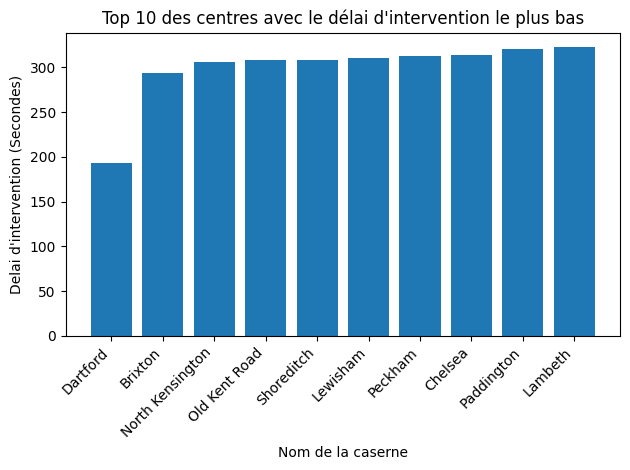

In [ ]:
# Calcule le taux moyen de "DelaiIntervention" pour chaque centre
mean_delai_intervention = pompier_alldata_new.groupby('DeployedFromStation_Name')['DelaiIntervention'].mean()

# Classement des centres selon ce delai
sorted_mean_delai_intervention = mean_delai_intervention.sort_values(ascending=True)

# Sélectionner les 10 centres avec le taux le plus bas
top_10_center = sorted_mean_delai_intervention.head(10)

# Création de l'histogramme
fig, ax = plt.subplots()
bars = ax.bar(top_10_center.index, top_10_center)

# Ajustement des étiquettes de l'axe horizontal
plt.xticks(rotation=45, ha='right')

# Ajout des étiquettes et du titre
plt.xlabel('Nom de la caserne')
plt.ylabel("Delai d'intervention (Secondes)")
plt.title("Top 10 des centres avec le délai d'intervention le plus bas")

# Affichage de l'histogramme
plt.tight_layout()
plt.show()


In [ ]:
# Analyse Stat
# H0 : le delai d'intervention ne dépend pas des casernes
# H1 : le delai d'intervention dépend des casernes

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the linear regression model
result = smf.ols('DelaiIntervention ~ DeployedFromStation_Name', data= pompier_alldata_new).fit()

# Perform ANOVA to analyze the fit of the model
table = sm.stats.anova_lm(result)

# Display the ANOVA table
display(table)

# Le delai depend de la caserne


,df,sum_sq,mean_sq,F,PR(>F)
DeployedFromStation_Name,104.0,6.297375e+08,6.055168e+06,279.400421,0.0
Residual,941555.0,2.040539e+10,2.167201e+04,NaN,NaN


Distances entre les casernes et les lieux d'intervention

In [ ]:
import pyproj as pyp
from pyproj import Proj, transform

# Conversion des colonnes Easting et Northing des lieux d'accidents en Latitudes/Longitudes
def conversion_lat_lon(df, easting_col, northing_col):
    in_proj = Proj(init='epsg:27700')  # EPSG code for British National Grid

    # Conversion pour chaque ligne du df
    def conversion (row):
        lon, lat = in_proj(row[easting_col], row[northing_col], inverse=True)
        return pd.Series({'Latitude_int': lat, 'Longitude_int': lon})

    # Appliquer la fonction de conversion au df
    lat_lon_df = df.apply(conversion, axis=1)

    # Concatener les nouvelles colonnes lat/lon avec le dataframe d'origine
    df_with_lat_lon = pd.concat([df, lat_lon_df], axis=1)

    return df_with_lat_lon

# Appliquer la conversion easting/northing vers latitude/longitude sur le dataframe pompier_alldata_new
pompier_alldata_new = conversion_lat_lon (pompier_alldata_new, 'Easting_rounded', 'Northing_rounded')

display(pompier_alldata_new.head())

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DeployedFromLocation,PumpOrder,PlusCode_Description,Month,Latitude_Station,Longitude_Station,Adress_Station,codepostal_Station,Latitude_int,Longitude_int
1157824,000004-01012017,2017-01-01,2017,00:06:18,0,False Alarm,AFA,Not_concerned,Non Residential,Engineering manufacturing plant,...,Home Station,1,Initial Mobilisation,1,51.487470,0.091500,1 Lakedale Road,SE18 1PP,51.492535,0.119893
1157825,000005-01012017,2017-01-01,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,Home Station,1,Initial Mobilisation,1,51.527369,-0.130674,172 Euston Road,NW1 2DH,51.530719,-0.114815
1157826,000006-01012017,2017-01-01,2017,00:07:57,0,Fire,Primary Fire,Not_concerned,Non Residential,Restaurant/cafe,...,Home Station,1,Initial Mobilisation,1,51.530010,0.088970,Alfreds Way,IG11 0BB,51.540809,0.086079
1157827,000008-01012017,2017-01-01,2017,00:12:44,0,Fire,Secondary Fire,Not_concerned,Outdoor,Loose refuse,...,Home Station,1,Initial Mobilisation,1,51.554650,-0.359570,74 Pett's Hill,UB5 4JT,51.542390,-0.352310
1157828,000008-01012017,2017-01-01,2017,00:12:44,0,Fire,Secondary Fire,Not_concerned,Outdoor,Loose refuse,...,Home Station,2,Initial Mobilisation,1,51.554650,-0.359570,74 Pett's Hill,UB5 4JT,51.542390,-0.352310


In [ ]:
#  ajouter les distances casernes-lieu d'accident avec la méthode Manhattan
import pandas as pd
import math

def manhattan_distance(lat1, lon1, lat2, lon2):
    # Convertir les degrés en radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    # Rayon de la Terre en kilomètres
    radius = 6371.0
    # Différences de latitude et de longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Conversion en distance le long des axes de latitude et longitude
    dx = radius * dlat
    dy = radius * dlon * math.cos(lat1)  # Utilisation de la latitude moyenne pour estimer le facteur de correction
    # Distance Manhattan en kilomètres
    distance = abs(dx) + abs(dy)
    return distance

pompier_alldata_new['Distances'] = pompier_alldata_new.apply(lambda row: manhattan_distance(row['Latitude_Station'], row['Longitude_Station'], row['Latitude_int'], row['Longitude_int']), axis=1)


# Les distances sont exprimées en kilomètres, donc on va les convertir en mettre et les arrondir à la dizaine de mètre près
pompier_alldata_new["Distances"] = (pompier_alldata_new["Distances"] * 1000).round(-1)

display(pompier_alldata_new.head())

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,PumpOrder,PlusCode_Description,Month,Latitude_Station,Longitude_Station,Adress_Station,codepostal_Station,Latitude_int,Longitude_int,Distances
1157824,000004-01012017,2017-01-01,2017,00:06:18,0,False Alarm,AFA,Not_concerned,Non Residential,Engineering manufacturing plant,...,1,Initial Mobilisation,1,51.487470,0.091500,1 Lakedale Road,SE18 1PP,51.492535,0.119893,2530.0
1157825,000005-01012017,2017-01-01,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,1,Initial Mobilisation,1,51.527369,-0.130674,172 Euston Road,NW1 2DH,51.530719,-0.114815,1470.0
1157826,000006-01012017,2017-01-01,2017,00:07:57,0,Fire,Primary Fire,Not_concerned,Non Residential,Restaurant/cafe,...,1,Initial Mobilisation,1,51.530010,0.088970,Alfreds Way,IG11 0BB,51.540809,0.086079,1400.0
1157827,000008-01012017,2017-01-01,2017,00:12:44,0,Fire,Secondary Fire,Not_concerned,Outdoor,Loose refuse,...,1,Initial Mobilisation,1,51.554650,-0.359570,74 Pett's Hill,UB5 4JT,51.542390,-0.352310,1870.0
1157828,000008-01012017,2017-01-01,2017,00:12:44,0,Fire,Secondary Fire,Not_concerned,Outdoor,Loose refuse,...,2,Initial Mobilisation,1,51.554650,-0.359570,74 Pett's Hill,UB5 4JT,51.542390,-0.352310,1870.0


count    941660.000000
mean       3455.550687
std        4844.983177
min          10.000000
25%        1380.000000
50%        2260.000000
75%        3570.000000
max       70220.000000
Name: Distances, dtype: float64

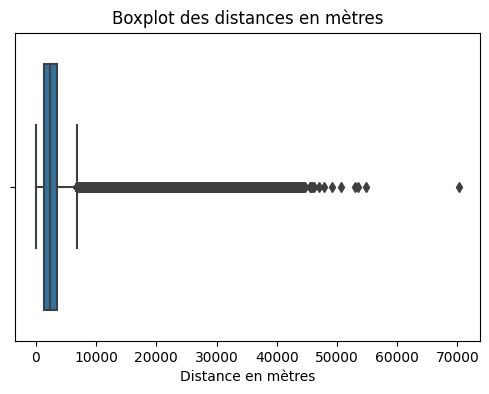

In [ ]:
# Verification de la qualité des valeurs calculées
display (pompier_alldata_new["Distances"].describe())

# Visualisation d'un boxplot pour détecter les valeurs aberrantes
plt.figure(figsize=(6,4))
sns.boxplot(x=pompier_alldata_new["Distances"])
plt.title('Boxplot des distances en mètres')
plt.xlabel('Distance en mètres')
plt.show();

In [ ]:
# Suppression de la valeur aberrante
pompier_alldata_new = pompier_alldata_new[pompier_alldata_new["Distances"] < 50000]

display (pompier_alldata_new["Distances"].describe())

count    941655.000000
mean       3455.269361
std        4843.430537
min          10.000000
25%        1380.000000
50%        2260.000000
75%        3570.000000
max       49190.000000
Name: Distances, dtype: float64

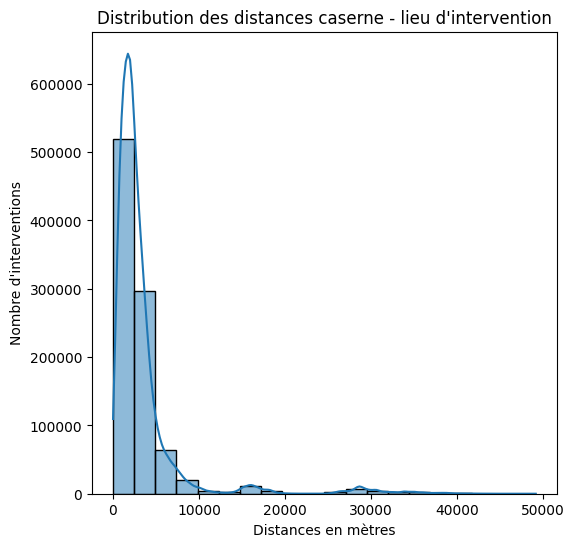

In [ ]:
# Visualisation de l'histogramme pour vérifier la distribution
plt.figure(figsize=(6, 6))
sns.histplot(pompier_alldata_new["Distances"], bins=20, kde=True)
plt.title("Distribution des distances caserne - lieu d'intervention")
plt.xlabel("Distances en mètres")
plt.ylabel("Nombre d'interventions")
plt.show();
# on peut considérer que les distances calculées sont pertinentes

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


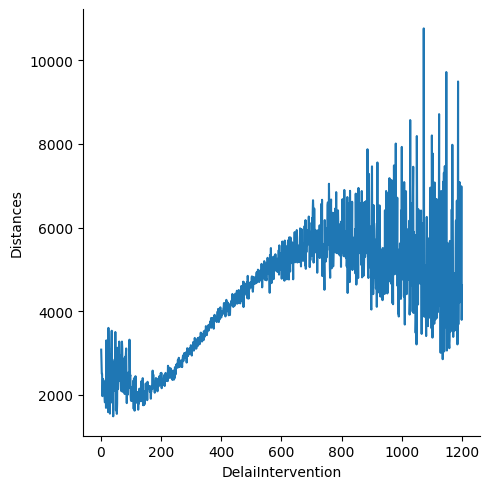

In [ ]:
import seaborn as sns
# Observation de la relation Distances - Delai d'intervention
sns.relplot(x="DelaiIntervention", y= "Distances", kind = "line", data = pompier_alldata_new , ci = None)


In [ ]:
# On peut considérer que pour des distances supérieures à 7 km, les données ne sont plus exploitables.
# Nous allons donc les suprrimer en vue des modélisations
pompier_alldata_new = pompier_alldata_new[pompier_alldata_new["Distances"] <= 7000]


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


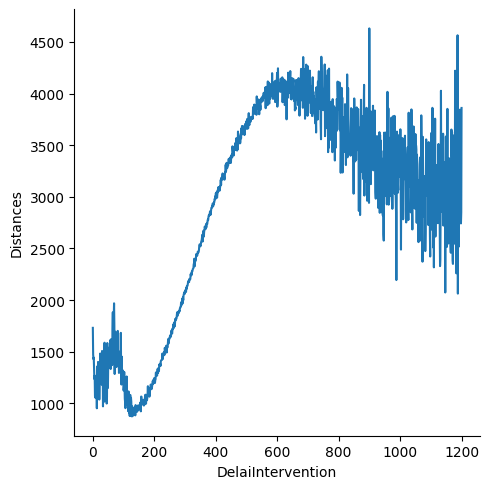

In [ ]:
# Observation de la relation Distances - Délai d'intervention
sns.relplot(x="DelaiIntervention", y= "Distances", kind = "line", data = pompier_alldata_new , ci = None);


In [ ]:
# Description du temps que mettent les pompiers pour se préparer
pompier_alldata_new['TurnoutTimeSeconds'].describe()

count    607774.000000
mean         74.432083
std          37.501574
min           0.000000
25%          54.000000
50%          70.000000
75%          89.000000
max        1143.000000
Name: TurnoutTimeSeconds, dtype: float64

In [ ]:
#Ils mettent en moyenne 74 secondes soit
def secondes_en_minutes_secondes(secondes):
    minutes = secondes // 60
    secondes_restantes = secondes % 60
    return minutes, secondes_restantes

temps_en_secondes = 74

minutes, secondes = secondes_en_minutes_secondes(temps_en_secondes)
print(f" {minutes} minutes et {secondes} secondes.")

 1 minutes et 14 secondes.


In [ ]:
# Ajout du seuil mini pour chaque intervention

pompier_alldata_new['seuilmin']= (pompier_alldata_new["Distances"]/ (90*(1000/3600))) + 74
pompier_alldata_new.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,PlusCode_Description,Month,Latitude_Station,Longitude_Station,Adress_Station,codepostal_Station,Latitude_int,Longitude_int,Distances,seuilmin
1157824,000004-01012017,2017-01-01,2017,00:06:18,0,False Alarm,AFA,Not_concerned,Non Residential,Engineering manufacturing plant,...,Initial Mobilisation,1,51.487470,0.091500,1 Lakedale Road,SE18 1PP,51.492535,0.119893,2530.0,175.2
1157825,000005-01012017,2017-01-01,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,Initial Mobilisation,1,51.527369,-0.130674,172 Euston Road,NW1 2DH,51.530719,-0.114815,1470.0,132.8
1157826,000006-01012017,2017-01-01,2017,00:07:57,0,Fire,Primary Fire,Not_concerned,Non Residential,Restaurant/cafe,...,Initial Mobilisation,1,51.530010,0.088970,Alfreds Way,IG11 0BB,51.540809,0.086079,1400.0,130.0
1157827,000008-01012017,2017-01-01,2017,00:12:44,0,Fire,Secondary Fire,Not_concerned,Outdoor,Loose refuse,...,Initial Mobilisation,1,51.554650,-0.359570,74 Pett's Hill,UB5 4JT,51.542390,-0.352310,1870.0,148.8
1157828,000008-01012017,2017-01-01,2017,00:12:44,0,Fire,Secondary Fire,Not_concerned,Outdoor,Loose refuse,...,Initial Mobilisation,1,51.554650,-0.359570,74 Pett's Hill,UB5 4JT,51.542390,-0.352310,1870.0,148.8


In [ ]:
col = ["DelaiIntervention","seuilmin"]
display (pompier_alldata_new[col])

diff = pompier_alldata_new[pompier_alldata_new["DelaiIntervention"] < pompier_alldata_new["seuilmin"]]
display (diff)

,DelaiIntervention,seuilmin
1157824,835,175.2
1157825,237,132.8
1157826,282,130.0
1157827,415,148.8
1157828,420,148.8
...,...,...
2100321,237,108.4
2100322,17,89.2
2100323,690,176.0
2100324,337,159.2


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,PlusCode_Description,Month,Latitude_Station,Longitude_Station,Adress_Station,codepostal_Station,Latitude_int,Longitude_int,Distances,seuilmin
1157853,000048-01012017,2017-01-01,2017,00:47:35,0,False Alarm,AFA,Not_concerned,Non Residential,Multi-Storey car park,...,Initial Mobilisation,1,51.500790,-0.025560,43 Westferry Road,E14 8JH,51.499300,-0.009481,1280.0,125.2
1157856,000052-01012017,2017-01-01,2017,00:53:10,0,Special Service,Special Service,Medical Incident - Co-responder,Non Residential,Pub/wine bar/bar,...,Initial Mobilisation,1,51.437830,-0.162710,1 Trinity Road,SW17 7SQ,51.465271,-0.127593,5490.0,293.6
1157870,000066-01012017,2017-01-01,2017,01:15:45,1,Fire,Secondary Fire,Not_concerned,Outdoor,Hedge,...,Initial Mobilisation,1,51.523250,0.056940,210 High Street South,E6 3RS,51.501827,0.052594,2680.0,181.2
1157927,000160-01012017,2017-01-01,2017,06:08:28,6,Special Service,Special Service,Suicide/attempts,Non Residential,Fire station,...,Initial Mobilisation,1,51.552830,-0.141690,20 Highgate Road,NW5 1NT,51.551805,-0.139910,240.0,83.6
1157946,000180-01012017,2017-01-01,2017,07:24:14,7,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,Initial Mobilisation,1,51.548508,0.043957,97 Homerton High Street,E9 6DL,51.544937,-0.049319,6850.0,348.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100183,213808-31122022,2022-12-31,2022,19:28:54,19,False Alarm,AFA,Not_concerned,Non Residential,Infant/Primary school,...,Initial Mobilisation,12,51.442528,0.045222,155 Stansted Road,SE23 1HP,51.455506,-0.025783,6360.0,328.4
2100189,213813-31122022,2022-12-31,2022,19:40:07,19,Special Service,Special Service,Medical Incident,Outdoor,Cycle path/public footpath/bridleway,...,Initial Mobilisation,12,51.560620,0.008690,466 High Road,E11 3HN,51.552127,0.004366,1240.0,123.6
2100217,213848-31122022,2022-12-31,2022,20:29:55,20,Special Service,Special Service,Medical Incident,Outdoor,Road surface/pavement,...,Initial Mobilisation,12,51.473590,-0.049260,266 Queen's Road,SE14 5JN,51.477533,-0.052197,640.0,99.6
2100260,213883-31122022,2022-12-31,2022,21:43:01,21,False Alarm,AFA,Not_concerned,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,...,Initial Mobilisation,12,51.512090,-0.313910,60-64 Uxbridge Road,W13 8RA,51.508233,-0.353543,3170.0,200.8


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


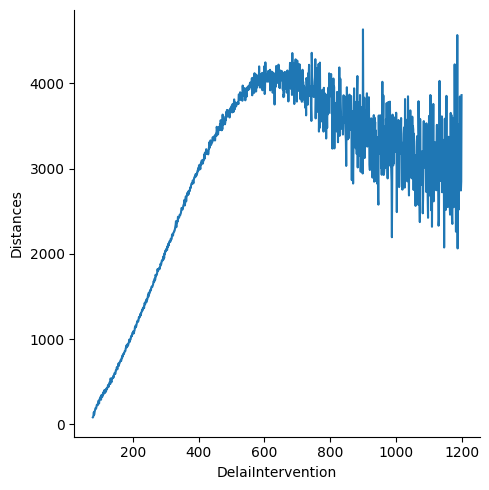

In [ ]:
# Suppression des lignes dont le delai d'intervention est inférieur au seuil mini
pompier_alldata_new = pompier_alldata_new[pompier_alldata_new["DelaiIntervention"] >= pompier_alldata_new["seuilmin"]]

# Observation de la relation Distances - Délai d'intervention
sns.relplot(x="DelaiIntervention", y= "Distances", kind = "line", data = pompier_alldata_new , ci = None);


In [ ]:
# Delai d'intervention en fonction de la distance
# Analyse Stat
# H0 : Distance et délai d'intervention sont indépendantes
# H1 : le délai dépend de la distance
import statsmodels.api as sm
X = sm.add_constant(pompier_alldata_new['Distances'])  # Ajouter une constante pour l'interception
y = pompier_alldata_new['DelaiIntervention']

model = sm.OLS(y, X).fit()
print(model.summary())

# Le délai d'intervention dépend de la distance

                            OLS Regression Results                            
Dep. Variable:      DelaiIntervention   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                 3.365e+04
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:19:46   Log-Likelihood:            -6.0345e+06
No. Observations:              941660   AIC:                         1.207e+07
Df Residuals:                  941658   BIC:                         1.207e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        329.2330      0.186   1771.127      0.0

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


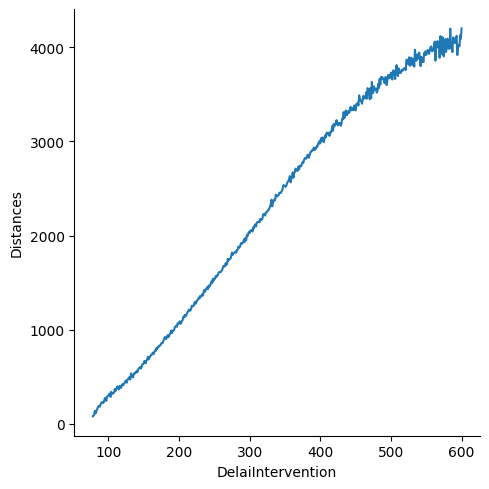

In [ ]:
# Suppression des lignes dont le delai d'intervention est supérieur à 600s
pompier_alldata_new = pompier_alldata_new[pompier_alldata_new["DelaiIntervention"] <=600]

# Observation de la relation Distances - Délai d'intervention
sns.relplot(x="DelaiIntervention", y= "Distances", kind = "line", data = pompier_alldata_new , ci = None);

Création de deux colonnes pour séparer les distances en courtes distances et longues distance

In [ ]:
# Les distances courtes sont toutes les distances inférieures à 2000m soit 2km
pompier_alldata_new['Distances courtes'] = 0
for index, row in pompier_alldata_new.iterrows():
    if row['Distances'] < 2000:
        pompier_alldata_new.at[index, 'Distances courtes'] = 1
    else:
        pompier_alldata_new.at[index, 'Distances courtes'] = 0


In [ ]:
pompier_alldata_new['Distances longues'] = (pompier_alldata_new['Distances'] >= 2000).astype(int)


In [ ]:
pompier_alldata_new.head(5)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,Latitude_Station,Longitude_Station,Adress_Station,codepostal_Station,Latitude_int,Longitude_int,Distances,seuilmin,Distances courtes,Distances longues
1157824,000004-01012017,2017-01-01,2017,00:06:18,0,False Alarm,AFA,NaN,Non Residential,Engineering manufacturing plant,...,51.487470,0.091500,1 Lakedale Road,SE18 1PP,51.492535,0.119893,2530.0,175.2,0,1
1157825,000005-01012017,2017-01-01,2017,00:06:34,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,51.527369,-0.130674,172 Euston Road,NW1 2DH,51.530719,-0.114815,1470.0,132.8,1,0
1157826,000006-01012017,2017-01-01,2017,00:07:57,0,Fire,Primary Fire,NaN,Non Residential,Restaurant/cafe,...,51.530010,0.088970,Alfreds Way,IG11 0BB,51.540809,0.086079,1400.0,130.0,1,0
1157827,000008-01012017,2017-01-01,2017,00:12:44,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,51.554650,-0.359570,74 Pett's Hill,UB5 4JT,51.542390,-0.352310,1870.0,148.8,1,0
1157828,000008-01012017,2017-01-01,2017,00:12:44,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,51.554650,-0.359570,74 Pett's Hill,UB5 4JT,51.542390,-0.352310,1870.0,148.8,1,0


In [ ]:
""" Ce travail autour des distances nous a permis d'envisager le problème de de prédiction du délai d'intervention sous forme de Classification,
mais après plusieurs essais, nous n'utiliserons pas ces notions de distances courtes ou longues car elles perturbent notre jeu de données.
Nous ferons notre Classification en transformant notre délai d'intervention en variable binaire "délai court" / "délai long" dans le notebook dédié à cette réalisation"""

Definition du DataFrame pour les modélisations

In [ ]:
# Verification de la colonne NumCalls
display (pompier_alldata_new["NumCalls"].nunique())
display (pompier_alldata_new["NumCalls"].value_counts().sort_values(ascending=False))

# Nous conserverons cette variable pour les modélisations

77

1.0      667438
2.0       99709
3.0       17086
4.0        5721
5.0        3205
          ...  
106.0         2
130.0         1
95.0          1
73.0          1
49.0          1
Name: NumCalls, Length: 77, dtype: int64

In [ ]:
pompier_alldata_new["ResourceMobilisationId"].nunique()

# on peut ignorer cette colonne pour les modélisations

In [ ]:
# Vérification doublons
print (pompier_alldata_new.duplicated().sum())

0


In [ ]:
colonnes6 = ["IncidentNumber", "IncidentGroup", "Month", "HourOfCall", "CalYear","PropertyCategory","Resource_Code","IncGeo_BoroughName","IncidentStationGround",
             "DeployedFromLocation","DeployedFromStation_Name","NumCalls","DelaiIntervention","Distances","Distances courtes","Distances longues"]

df6 = pompier_alldata_new [colonnes6]
df6.set_index("IncidentNumber", inplace=True)

display (df6.head ())
display (df6.info())

,IncidentGroup,Month,HourOfCall,CalYear,PropertyCategory,Resource_Code,IncGeo_BoroughName,IncidentStationGround,DeployedFromLocation,DeployedFromStation_Name,NumCalls,DelaiIntervention,Distances,Distances courtes,Distances longues
IncidentNumber,,,,,,,,,,,,,,,
000005-01012017,Special Service,1,0,2017,Dwelling,A231,ISLINGTON,Euston,Home Station,Euston,1.0,237,1470.0,1,0
000006-01012017,Fire,1,0,2017,Non Residential,F431,BARKING AND DAGENHAM,Barking,Home Station,Barking,1.0,282,1400.0,1,0
000008-01012017,Fire,1,0,2017,Outdoor,G311,EALING,Northolt,Home Station,Northolt,1.0,415,1870.0,1,0
000008-01012017,Fire,1,0,2017,Outdoor,G312,EALING,Northolt,Home Station,Northolt,1.0,420,1870.0,1,0
000009-01012017,False Alarm,1,0,2017,Non Residential,F241,ISLINGTON,Shoreditch,Home Station,Shoreditch,1.0,230,600.0,1,0


<class 'pandas.core.frame.DataFrame'>
Index: 804134 entries, 000005-01012017 to 213957-31122022
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IncidentGroup             804134 non-null  object 
 1   Month                     804134 non-null  int64  
 2   HourOfCall                804134 non-null  int64  
 3   CalYear                   804134 non-null  int64  
 4   PropertyCategory          804134 non-null  object 
 5   Resource_Code             804134 non-null  object 
 6   IncGeo_BoroughName        804134 non-null  object 
 7   IncidentStationGround     804134 non-null  object 
 8   DeployedFromLocation      804134 non-null  object 
 9   DeployedFromStation_Name  804134 non-null  object 
 10  NumCalls                  804134 non-null  float64
 11  DelaiIntervention         804134 non-null  int64  
 12  Distances                 804134 non-null  float64
 13  Distances courtes         

None

In [ ]:
# Vérification doublons
print (df6.duplicated().sum())

56


In [ ]:
df6.drop_duplicates(inplace = True)
print (df6.duplicated().sum())

<ipython-input-29-5a41110bd63d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop_duplicates(inplace = True)


0


In [ ]:
# Export au format csv du Dataframe df pour procéder aux modélsations dans un prochain NoteBook
df6.to_csv('/content/drive/MyDrive/df6c.csv', index=True)